In [1]:
# Import các thư viện cần thiết và các hàm đã viết
import numpy as np
import sys
# Thêm thư mục src vào path để có thể import
sys.path.append('../')
from src.data_exploring import (
    load_dataset,
    summarize_data,
    analyze_categorical_column,
    analyze_numerical_column,
    generate_missing_value_report,
    analyze_categorical_vs_target, 
    analyze_numerical_vs_target
)

# Đường dẫn tới file dữ liệu
filepath = '../data/raw/BankChurners.csv'

# Tải dữ liệu
credit_data = load_dataset(filepath)

# Xóa 2 cột cuối cùng không cần thiết (chứa giá trị NaN) 
#(2 cột cuối là kết quả chạy model của người khác, không phải thông tin khách hàng
credit_data = credit_data[list(credit_data.dtype.names)[:-2]]

Tải dữ liệu thành công từ ../data/raw/BankChurners.csv


# Câu hỏi Ban đầu về Dữ liệu Khách hàng

1. **Kích thước Dữ liệu:**
    * Dữ liệu này có bao nhiêu **khách hàng** và bao nhiêu **thông tin** (đặc điểm/biến) về họ?
2. **Giá trị Thiếu (Missing Values):**
    * Có thông tin nào bị thiếu không? Cụ thể, có bao nhiêu **giá trị "Unknown"** trong các cột dữ liệu?
3. **Biến Mục tiêu (Attrition_Flag):**
    * **Tỷ lệ khách hàng rời đi** (**Attrition_Flag**) là bao nhiêu? Đây là biến mục tiêu quan trọng nhất.
4. **Đặc điểm Nhân khẩu học:**
    * Đặc điểm **nhân khẩu học** của các khách hàng này như thế nào? (Bao gồm **tuổi**, **giới tính**, **học vấn**).
5. **Đặc điểm Tài chính:**
    * Các đặc điểm **tài chính** (ví dụ: **thu nhập**, **giới hạn thẻ**,...) được **phân phối** ra sao?

# Dữ liệu này có bao nhiêu khách hàng và bao nhiêu thông tin về họ?

In [2]:
summarize_data(credit_data)

print(f"\n In ra 1 dòng dữ liệu đầu tiên: ")
print(credit_data[1])


--- Thông tin Tổng quan ---
Số dòng: 10127
Số cột: 21
Tên các cột:
 - CLIENTNUM (kiểu: int64)
 - Attrition_Flag (kiểu: <U19)
 - Customer_Age (kiểu: int64)
 - Gender (kiểu: <U3)
 - Dependent_count (kiểu: int64)
 - Education_Level (kiểu: <U15)
 - Marital_Status (kiểu: <U10)
 - Income_Category (kiểu: <U16)
 - Card_Category (kiểu: <U10)
 - Months_on_book (kiểu: int64)
 - Total_Relationship_Count (kiểu: int64)
 - Months_Inactive_12_mon (kiểu: int64)
 - Contacts_Count_12_mon (kiểu: int64)
 - Credit_Limit (kiểu: float64)
 - Total_Revolving_Bal (kiểu: int64)
 - Avg_Open_To_Buy (kiểu: float64)
 - Total_Amt_Chng_Q4_Q1 (kiểu: float64)
 - Total_Trans_Amt (kiểu: int64)
 - Total_Trans_Ct (kiểu: int64)
 - Total_Ct_Chng_Q4_Q1 (kiểu: float64)
 - Avg_Utilization_Ratio (kiểu: float64)
---------------------------


 In ra 1 dòng dữ liệu đầu tiên: 
(818770008, '"Existing Customer"', 49, '"F"', 5, '"Graduate"', '"Single"', '"Less than $40K"', '"Blue"', 44, 6, 1, 2, 8256.0, 864, 7392.0, 1.541, 1291, 33, 3.7

# Có cột dữ liệu nào bị missing value không?

In [3]:
#gọi hàm kiểm tra missing
generate_missing_value_report(credit_data)

--- Báo cáo Dữ liệu thiếu ---
Tuyệt vời! Không tìm thấy giá trị thiếu nào trong dataset.
-----------------------------



# Tỷ lệ khách hàng rời đi (Attrition_Flag) là bao nhiêu? 
**Attrition_Flag** là biến target quan trọng nhất

--- Phân tích cột Categorical: 'Attrition_Flag' ---
Tần suất và Tỷ lệ:
 - '"Attrited Customer"': 1627 lần (16.07%)
 - '"Existing Customer"': 8500 lần (83.93%)


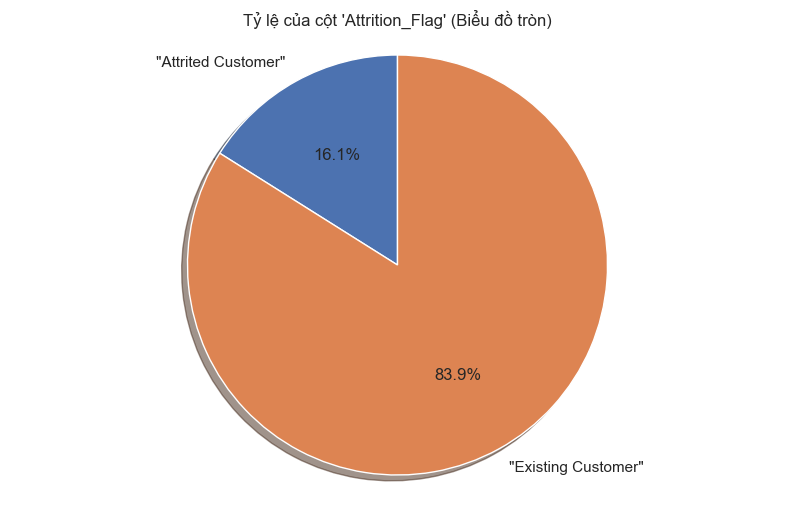

In [4]:
analyze_categorical_column(credit_data, 'Attrition_Flag', plot_type='pie')

# Đặc điểm nhân khẩu học (tuổi, giới tính, học vấn) của các khách hàng này như thế nào?

--- Phân tích cột Categorical: 'Gender' ---
Tần suất và Tỷ lệ:
 - '"F"': 5358 lần (52.91%)
 - '"M"': 4769 lần (47.09%)


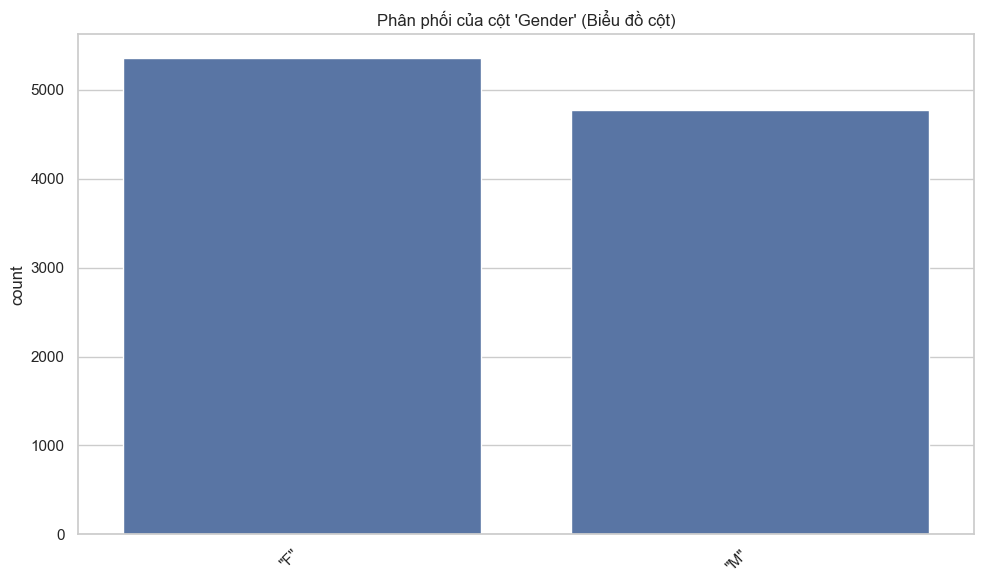

--- Phân tích cột Categorical: 'Education_Level' ---
Tần suất và Tỷ lệ:
 - '"College"': 1013 lần (10.00%)
 - '"Doctorate"': 451 lần (4.45%)
 - '"Graduate"': 3128 lần (30.89%)
 - '"High School"': 2013 lần (19.88%)
 - '"Post-Graduate"': 516 lần (5.10%)
 - '"Uneducated"': 1487 lần (14.68%)
 - '"Unknown"': 1519 lần (15.00%)


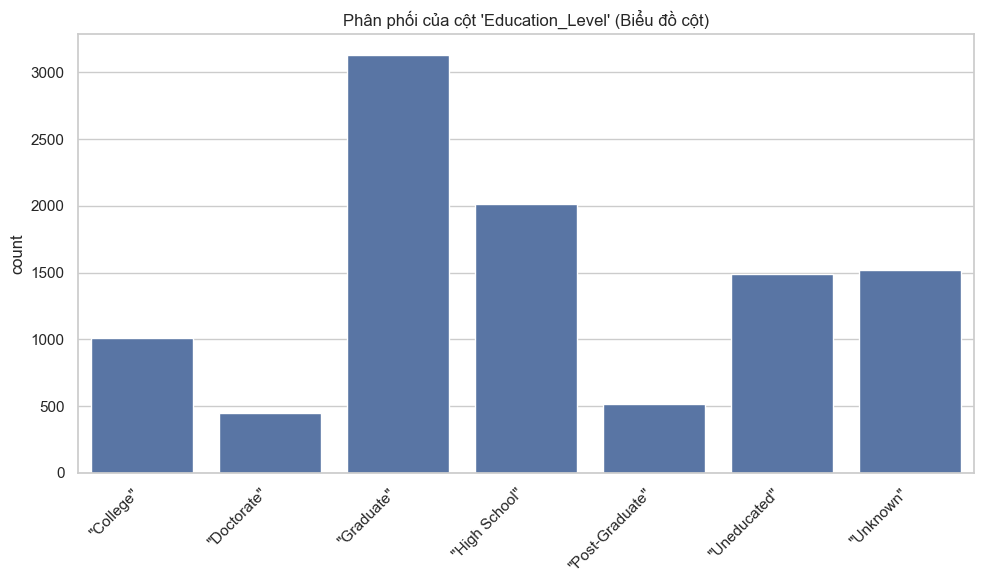

--- Phân tích cột Numerical: 'Customer_Age' ---
 - Mean: 46.33
 - Median: 46.00
 - Std Dev: 8.02
 - Min: 26
 - Max: 73


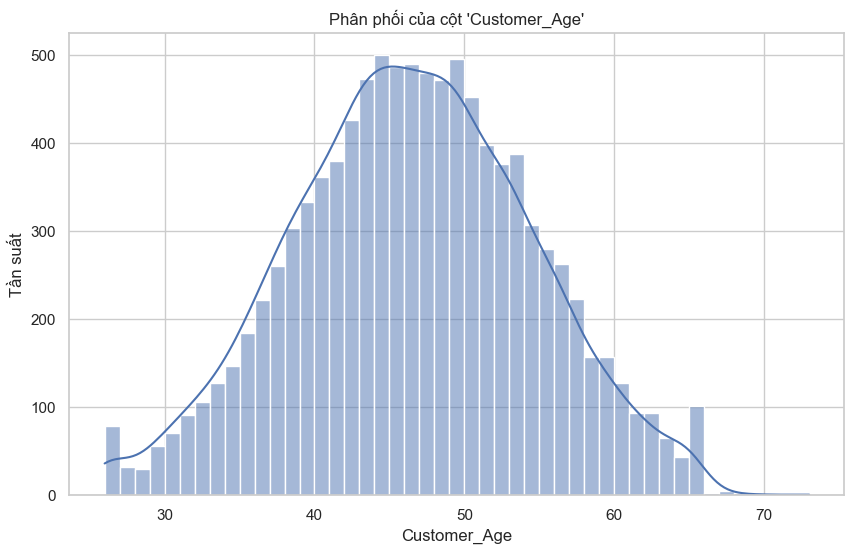

In [5]:
# Phân tích các cột categorical
analyze_categorical_column(credit_data, 'Gender')
analyze_categorical_column(credit_data, 'Education_Level')

# Phân tích cột numerical
analyze_numerical_column(credit_data, 'Customer_Age')

## Nhận xét về Dữ liệu Khách hàng

---

### Phân bố giới tính
* **Tỷ lệ khách hàng nam và nữ khá cân bằng.**

### Trình độ học vấn
* **Phần lớn khách hàng có trình độ học vấn là:**
    * Graduate
    * High School
    * Unknown

### Phân bố Độ tuổi
* **Độ tuổi của khách hàng** tập trung chủ yếu trong khoảng **40-50 tuổi**.
* Phân phối độ tuổi có dạng **gần giống Phân phối Chuẩn** (Normal Distribution).

# Các đặc điểm tài chính (ví dụ: thu nhập, giới hạn thẻ,...) được phân phối ra sao?

--- Phân tích cột Categorical: 'Income_Category' ---
Tần suất và Tỷ lệ:
 - '"$120K +"': 727 lần (7.18%)
 - '"$40K - $60K"': 1790 lần (17.68%)
 - '"$60K - $80K"': 1402 lần (13.84%)
 - '"$80K - $120K"': 1535 lần (15.16%)
 - '"Less than $40K"': 3561 lần (35.16%)
 - '"Unknown"': 1112 lần (10.98%)


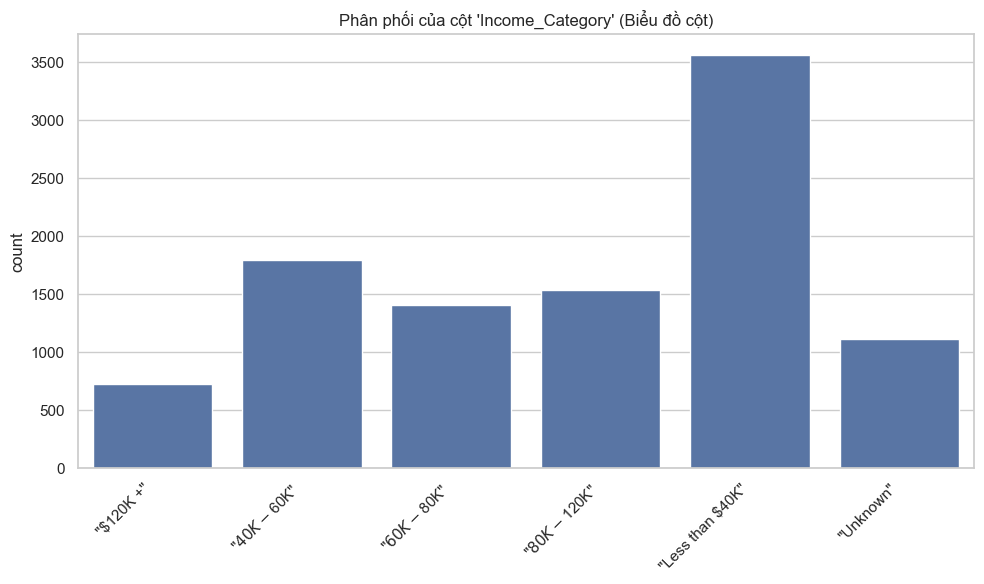

--- Phân tích cột Numerical: 'Credit_Limit' ---
 - Mean: 8631.95
 - Median: 4549.00
 - Std Dev: 9088.33
 - Min: 1438.3
 - Max: 34516.0


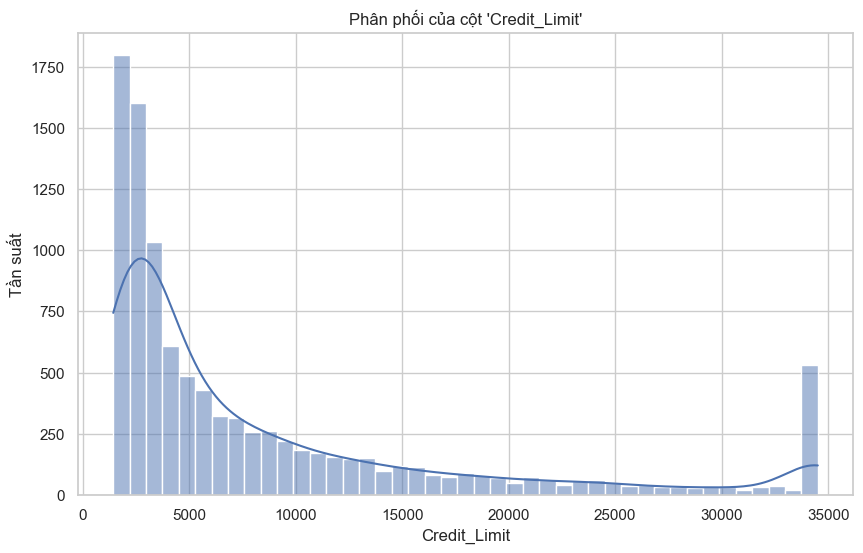

--- Phân tích cột Numerical: 'Total_Trans_Amt' ---
 - Mean: 4404.09
 - Median: 3899.00
 - Std Dev: 3396.96
 - Min: 510
 - Max: 18484


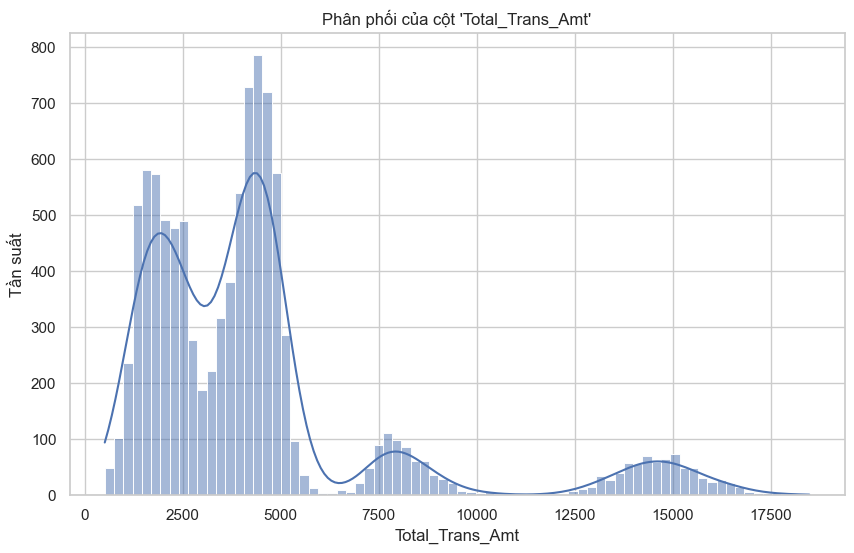

In [6]:
# Phân tích cột categorical
analyze_categorical_column(credit_data, 'Income_Category')

# Phân tích các cột numerical
analyze_numerical_column(credit_data, 'Credit_Limit')
analyze_numerical_column(credit_data, 'Total_Trans_Amt') # Tổng số tiền giao dịch

##  Nhận xét về Đặc điểm Tài chính Khách hàng

* **Thu nhập (Income):**
    * Hầu hết khách hàng có thu nhập **dưới $40K/năm**.


* **Giới hạn Thẻ Tín dụng (Credit_Limit) và Tổng Giao dịch (Total_Trans_Amt):**
    * Phân phối của **Credit_Limit** và **Total_Trans_Amt** bị **lệch phải** (right-skewed).
    * Điều này cho thấy có một số ít khách hàng có **hạn mức tín dụng** và **tổng giá trị giao dịch** **rất cao** so với phần còn lại của tập dữ liệu.
    * **Gợi ý xử lý:** Có thể cần áp dụng **phép biến đổi log** (log transformation) hoặc các kỹ thuật xử lý dữ liệu khác ở giai đoạn tiền xử lý.

## Phân tích Tương quan giữa Biến mục tiêu và Đặc trưng (Attrition_Flag)

## Phân tích tương quan trên các cột Gender, Income_Category, Card_Category

In [7]:
# --- BƯỚC 1: TỰ ĐỘNG PHÂN LOẠI CÁC CỘT ---

# Định nghĩa biến mục tiêu và các cột ID/không cần thiết cần loại bỏ
target_col = 'Attrition_Flag'
cols_to_exclude = ['CLIENTNUM']

# Lấy danh sách tất cả các tên cột
all_cols = credit_data.dtype.names

# Tạo danh sách trống
numerical_cols = []
categorical_cols = []

# Lặp qua tất cả các cột để phân loại
for col_name in all_cols:
    # Bỏ qua biến mục tiêu và các cột cần loại trừ
    if col_name == target_col or col_name in cols_to_exclude:
        continue
    
    # Lấy kiểu dữ liệu của cột
    dtype = credit_data.dtype[col_name]
    
    # Phân loại dựa trên kiểu dữ liệu
    if np.issubdtype(dtype, np.number):
        numerical_cols.append(col_name)
    else:
        categorical_cols.append(col_name)

print("Đã phân loại xong!")
print(f"\n{len(categorical_cols)} CỘT CATEGORICAL:\n{categorical_cols}")
print(f"\n{len(numerical_cols)} CỘT NUMERICAL:\n{numerical_cols}")

Đã phân loại xong!

5 CỘT CATEGORICAL:
['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

14 CỘT NUMERICAL:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']



========================= Phân tích cột: GENDER =========================

--- Tương quan: 'Gender' vs 'Attrition_Flag' ---
 - Nhóm 'F': 5358 khách hàng, Tỷ lệ rời đi = 17.36%
 - Nhóm 'M': 4769 khách hàng, Tỷ lệ rời đi = 14.62%


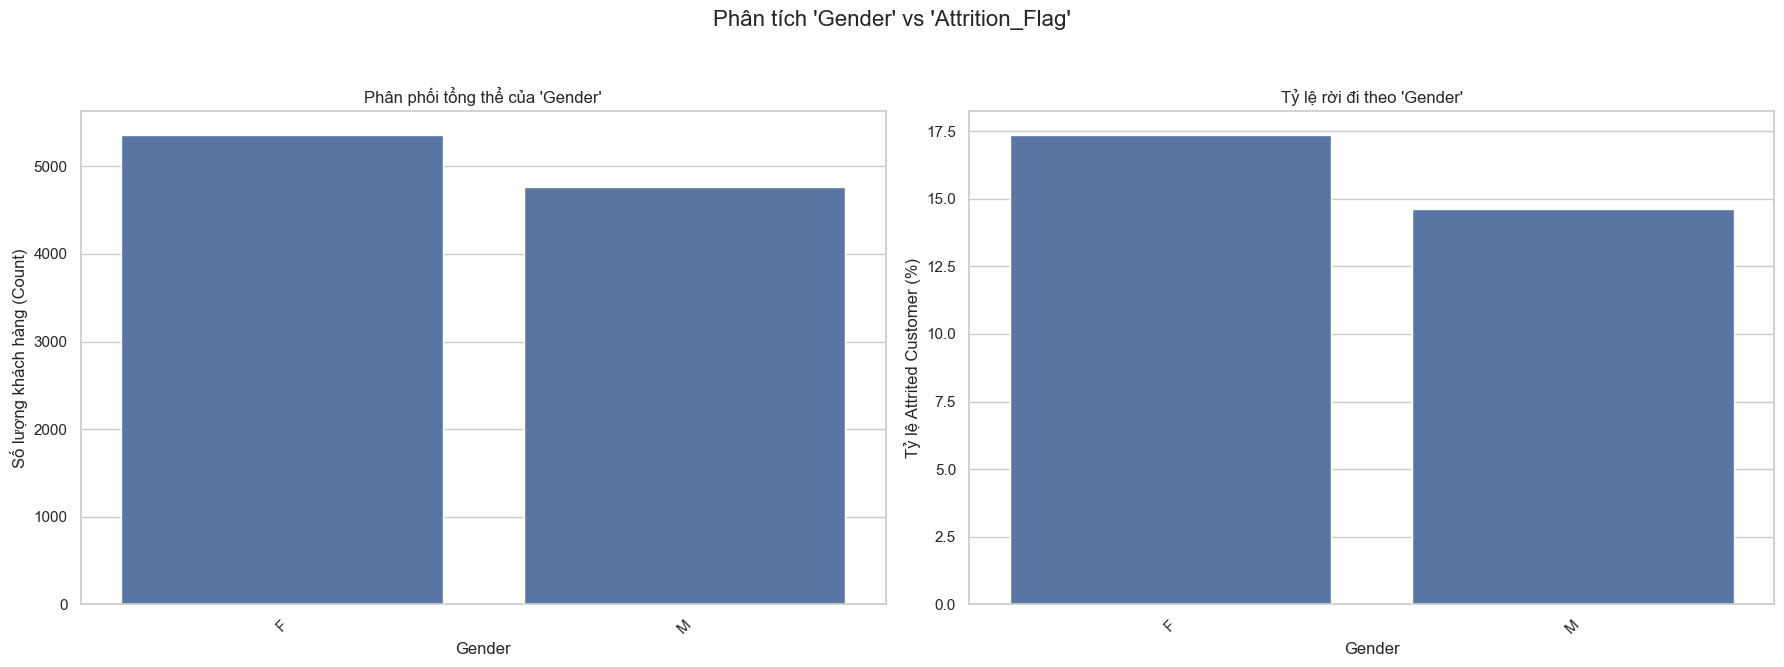


========================= Phân tích cột: EDUCATION_LEVEL =========================

--- Tương quan: 'Education_Level' vs 'Attrition_Flag' ---
 - Nhóm 'College': 1013 khách hàng, Tỷ lệ rời đi = 15.20%
 - Nhóm 'Doctorate': 451 khách hàng, Tỷ lệ rời đi = 21.06%
 - Nhóm 'Graduate': 3128 khách hàng, Tỷ lệ rời đi = 15.57%
 - Nhóm 'High School': 2013 khách hàng, Tỷ lệ rời đi = 15.20%
 - Nhóm 'Post-Graduate': 516 khách hàng, Tỷ lệ rời đi = 17.83%
 - Nhóm 'Uneducated': 1487 khách hàng, Tỷ lệ rời đi = 15.94%
 - Nhóm 'Unknown': 1519 khách hàng, Tỷ lệ rời đi = 16.85%


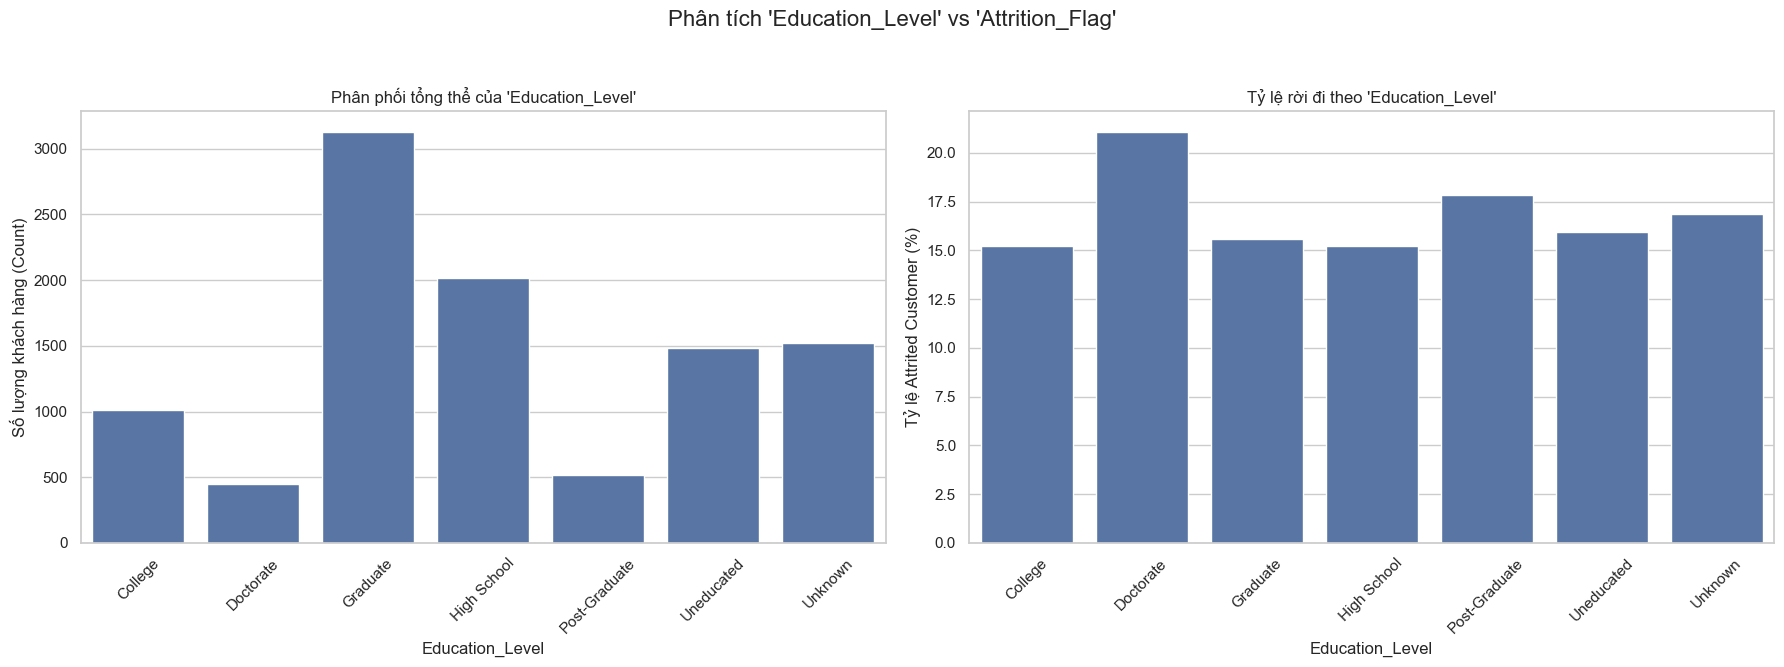


========================= Phân tích cột: MARITAL_STATUS =========================

--- Tương quan: 'Marital_Status' vs 'Attrition_Flag' ---
 - Nhóm 'Divorced': 748 khách hàng, Tỷ lệ rời đi = 16.18%
 - Nhóm 'Married': 4687 khách hàng, Tỷ lệ rời đi = 15.13%
 - Nhóm 'Single': 3943 khách hàng, Tỷ lệ rời đi = 16.94%
 - Nhóm 'Unknown': 749 khách hàng, Tỷ lệ rời đi = 17.22%


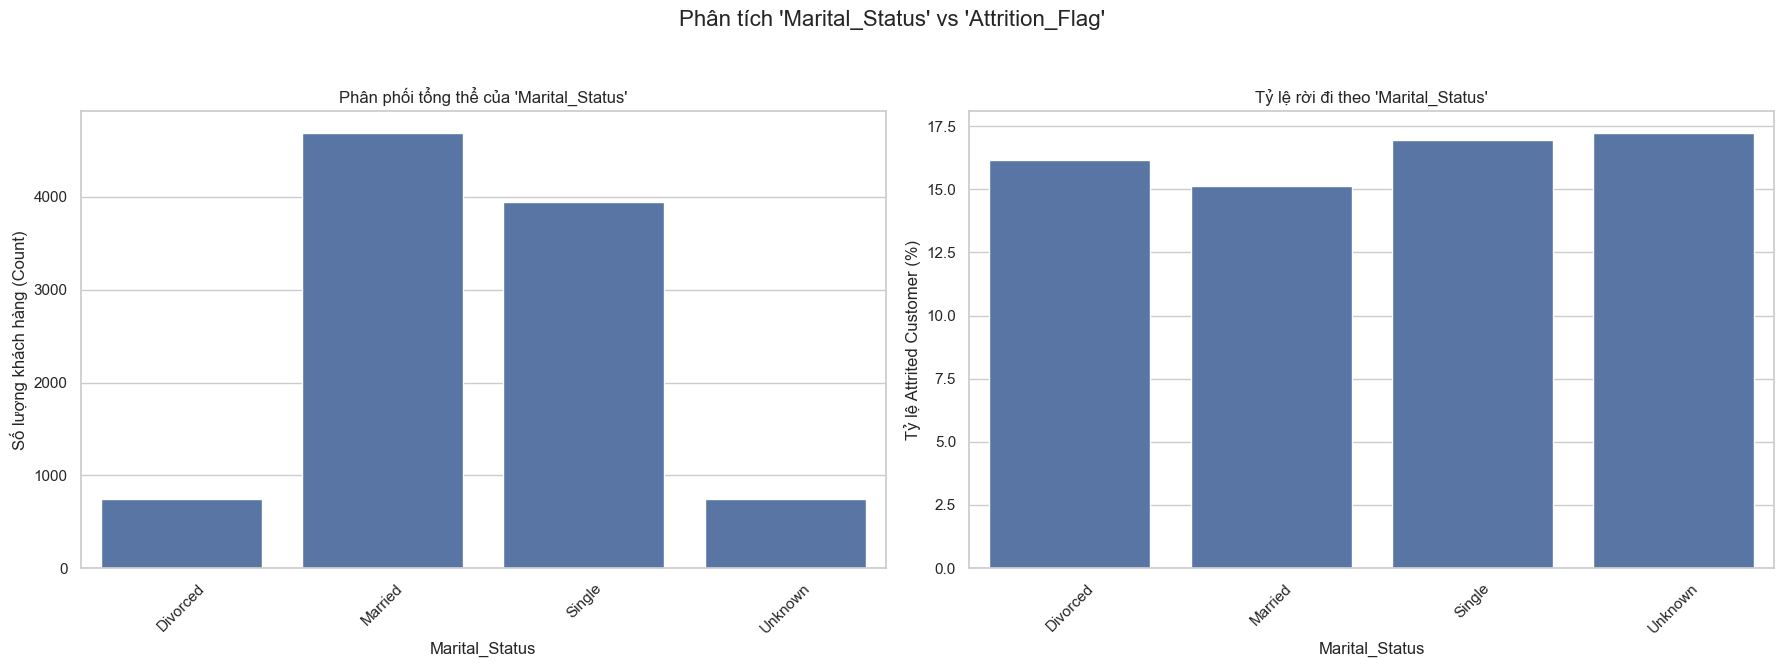


========================= Phân tích cột: INCOME_CATEGORY =========================

--- Tương quan: 'Income_Category' vs 'Attrition_Flag' ---
 - Nhóm '$120K +': 727 khách hàng, Tỷ lệ rời đi = 17.33%
 - Nhóm '$40K - $60K': 1790 khách hàng, Tỷ lệ rời đi = 15.14%
 - Nhóm '$60K - $80K': 1402 khách hàng, Tỷ lệ rời đi = 13.48%
 - Nhóm '$80K - $120K': 1535 khách hàng, Tỷ lệ rời đi = 15.77%
 - Nhóm 'Less than $40K': 3561 khách hàng, Tỷ lệ rời đi = 17.19%
 - Nhóm 'Unknown': 1112 khách hàng, Tỷ lệ rời đi = 16.82%


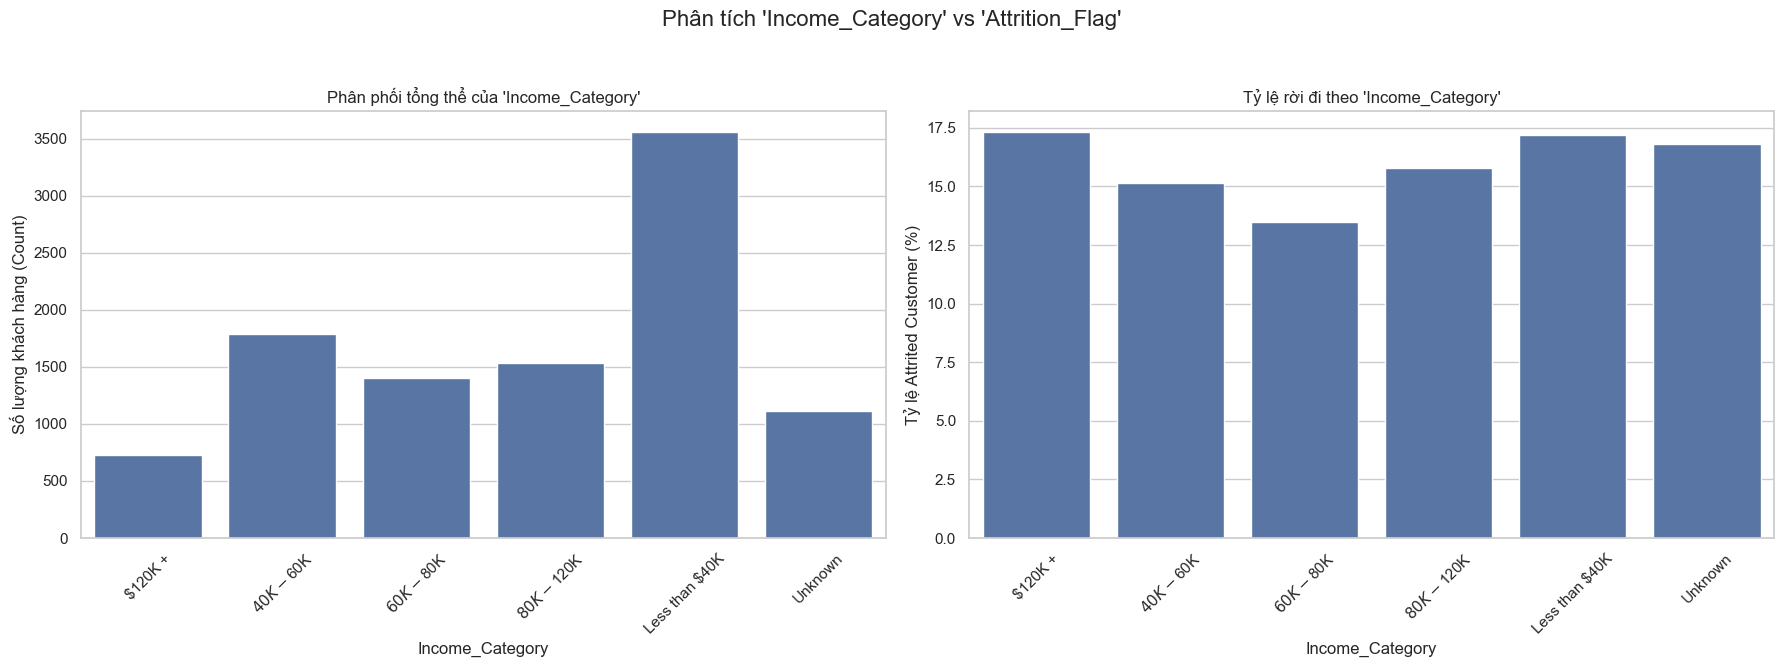


========================= Phân tích cột: CARD_CATEGORY =========================

--- Tương quan: 'Card_Category' vs 'Attrition_Flag' ---
 - Nhóm 'Blue': 9436 khách hàng, Tỷ lệ rời đi = 16.10%
 - Nhóm 'Gold': 116 khách hàng, Tỷ lệ rời đi = 18.10%
 - Nhóm 'Platinum': 20 khách hàng, Tỷ lệ rời đi = 25.00%
 - Nhóm 'Silver': 555 khách hàng, Tỷ lệ rời đi = 14.77%


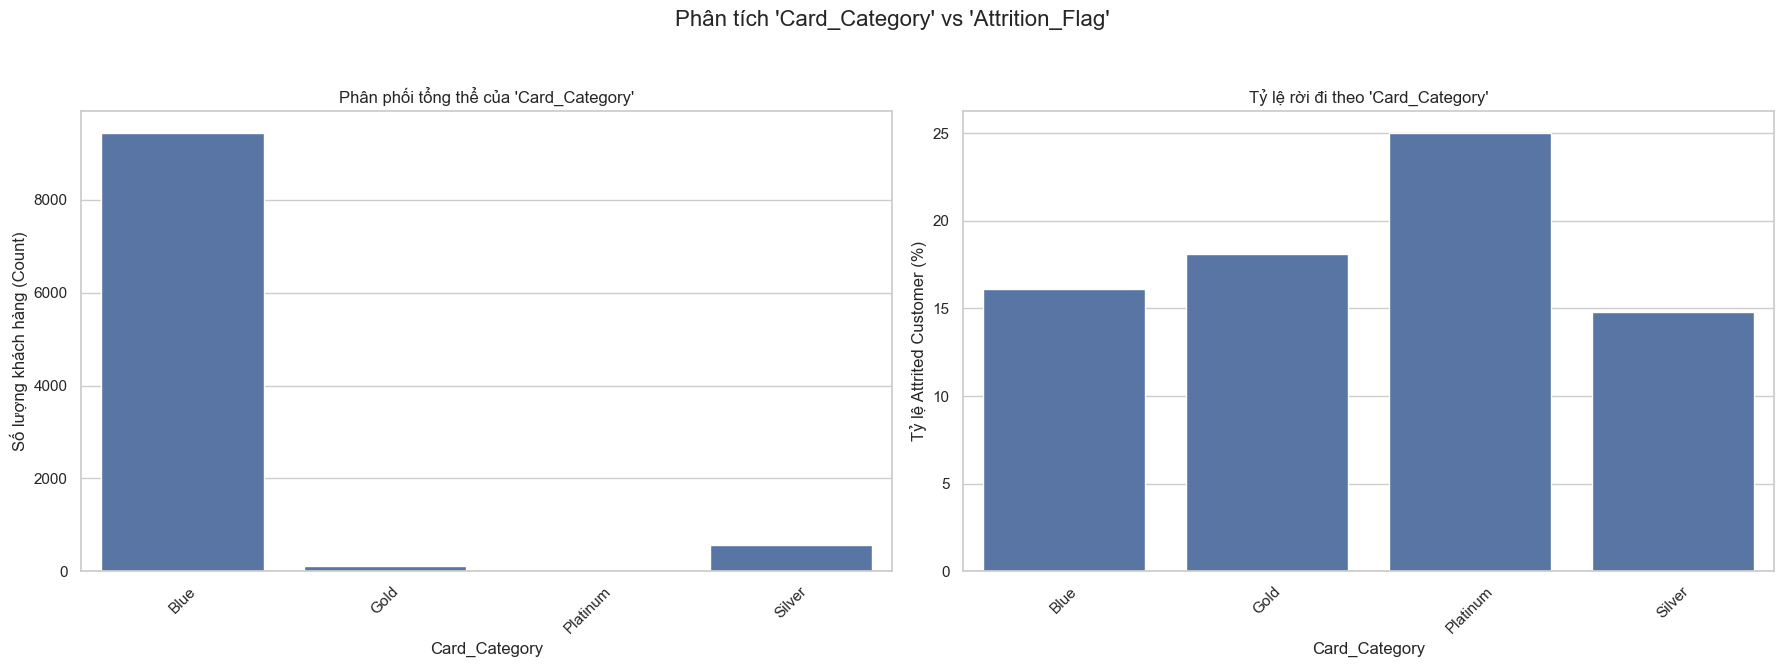

In [8]:
for col in categorical_cols:
    print(f"\n{'='*25} Phân tích cột: {col.upper()} {'='*25}\n")
    analyze_categorical_vs_target(credit_data, col, target_col)

##  Phân tích và Nhận định Chi tiết: Các biến Phân loại (Categorical)

---

### 1. GENDER (Giới tính) - *Ảnh hưởng Thấp*
* **Bối cảnh:** Số lượng khách hàng Nữ (5358) và Nam (4769) khá cân bằng.
* **Nhận định:** Tỷ lệ rời đi ở **Nữ (17.36%)** cao hơn một chút so với **Nam (14.62%)**.
* **Insight:** Mặc dù có sự khác biệt, nhưng nó không quá lớn. Giới tính có thể là một yếu tố ảnh hưởng phụ, nhưng chắc chắn **không phải là yếu tố quyết định chính** đến việc khách hàng rời đi.

---

### 2. INCOME_CATEGORY (Mức thu nhập) - *Ảnh hưởng Trung bình, Insight phức tạp*
* **Bối cảnh:** Nhóm khách hàng có thu nhập thấp (**Less than $40K**) chiếm số lượng đông đảo nhất.
* **Nhận định:** Tỷ lệ rời đi cao nhất ở hai thái cực:
    * Nhóm thu nhập cao nhất (**$120K +**: 17.33%)
    * Nhóm thu nhập thấp nhất (**Less than $40K**: 17.19%)
    * *(Thấp nhất là nhóm $60K - $80K: 13.48%)*
* **Insight Quan trọng:** Mối quan hệ giữa thu nhập và quyết định rời đi **không phải là đường thẳng**. Lý do rời đi có thể khác nhau:
    * *Nhóm thu nhập thấp:* Rời đi vì phí hoặc tìm thấy sản phẩm rẻ hơn.
    * *Nhóm thu nhập cao:* Rời đi vì nhận được lời mời hấp dẫn hơn từ đối thủ (dịch vụ cao cấp hơn).
    > *Đây là đặc trưng có giá trị, cần chiến lược giữ chân riêng cho từng phân khúc.*

---

### 3. MARITAL_STATUS (Tình trạng hôn nhân) - *Ảnh hưởng Trung bình*
* **Bối cảnh:** Khách hàng đã kết hôn (Married) và độc thân (Single) chiếm đa số.
* **Nhận định:** Khách hàng **Độc thân (Single: 16.94%)** và **Đã ly hôn (Divorced: 16.18%)** có tỷ lệ rời đi cao hơn so với khách hàng **Đã kết hôn (Married: 15.13%)**.
* **Insight:** Khách hàng đã kết hôn có xu hướng trung thành hơn (có thể do tài chính ổn định hoặc dùng chung tài khoản). Tình trạng hôn nhân là một yếu tố dự báo khá tốt.

---

### 4. EDUCATION_LEVEL (Trình độ học vấn) - *Ảnh hưởng TB đến Cao*
* **Bối cảnh:** Nhóm *Graduate* chiếm đa số, nhóm *Doctorate* và *Post-Graduate* khá ít.
* **Nhận định:** Tỷ lệ rời đi cao nhất nằm ở hai nhóm học vấn cao nhất:
    * **Doctorate (Tiến sĩ):** 21.06%
    * **Post-Graduate (Sau ĐH):** 17.83%
* **Insight Quan trọng:** Sự khác biệt rõ rệt ở nhóm học vấn cao.
    * *Giả thuyết 1:* Yêu cầu cao hơn về dịch vụ/công nghệ, sẵn sàng đổi nếu không được đáp ứng.
    * *Giả thuyết 2:* Am hiểu tài chính hơn, tích cực so sánh và tìm kiếm sản phẩm tốt nhất.

---

### 5. CARD_CATEGORY (Loại thẻ) - *Ảnh hưởng Rất Cao* 
* **Bối cảnh:** Phần lớn dùng thẻ *Blue*. Thẻ cao cấp (*Gold, Platinum*) rất ít.
* **Nhận định:** Tỷ lệ rời đi của nhóm **Platinum** là **25.00%** - cao báo động. Nhóm **Gold (18.10%)** cũng cao hơn trung bình.
* **Insight Quan trọng nhất:** Đây là đặc trưng có sức ảnh hưởng mạnh nhất.
    * **Vấn đề lớn:** Việc 1/4 khách hàng Platinum rời đi là thất bại trong việc giữ chân phân khúc VIP.
    * **Hành động:** Cần điều tra khẩn cấp (đặc quyền chưa xứng đáng? dịch vụ kém? đối thủ cạnh tranh?).

---

##  Tổng kết Insight Quan trọng

###  Hồ sơ Khách hàng Nguy cơ cao (High-Risk Profile)
Dựa trên phân tích, khách hàng có nguy cơ rời đi cao thường hội tụ các đặc điểm:
1.  Sở hữu thẻ **Platinum** hoặc **Gold**.
2.  Trình độ học vấn là **Doctorate** hoặc **Post-Graduate**.
3.  Đang **độc thân (Single)**.
4.  Thuộc nhóm thu nhập **rất thấp** hoặc **rất cao**.

###  Đặc trưng Dự báo Mạnh nhất
**`Card_Category`** và **`Education_Level`** là hai yếu tố phân biệt rõ rệt nhất giữa nhóm rời đi và ở lại.

###  Gợi ý Chiến lược
Ngân hàng nên tập trung nỗ lực giữ chân vào các nhóm rủi ro cao nêu trên, đặc biệt là **phân khúc khách hàng sở hữu thẻ cao cấp (VIP)**.


========================= Phân tích cột: CUSTOMER_AGE =========================

--- Tương quan: 'Customer_Age' vs 'Attrition_Flag' ---


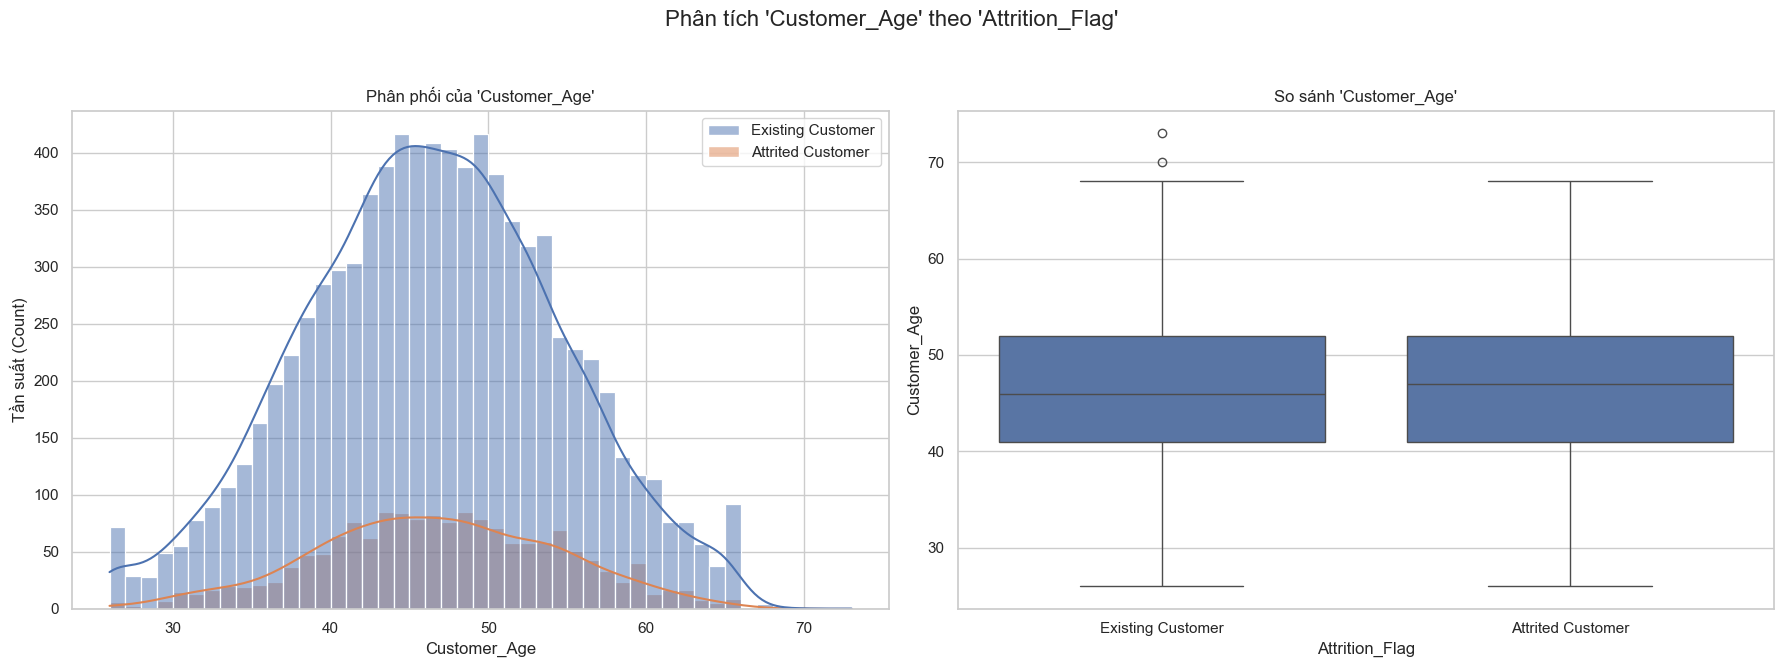


========================= Phân tích cột: DEPENDENT_COUNT =========================

--- Tương quan: 'Dependent_count' vs 'Attrition_Flag' ---


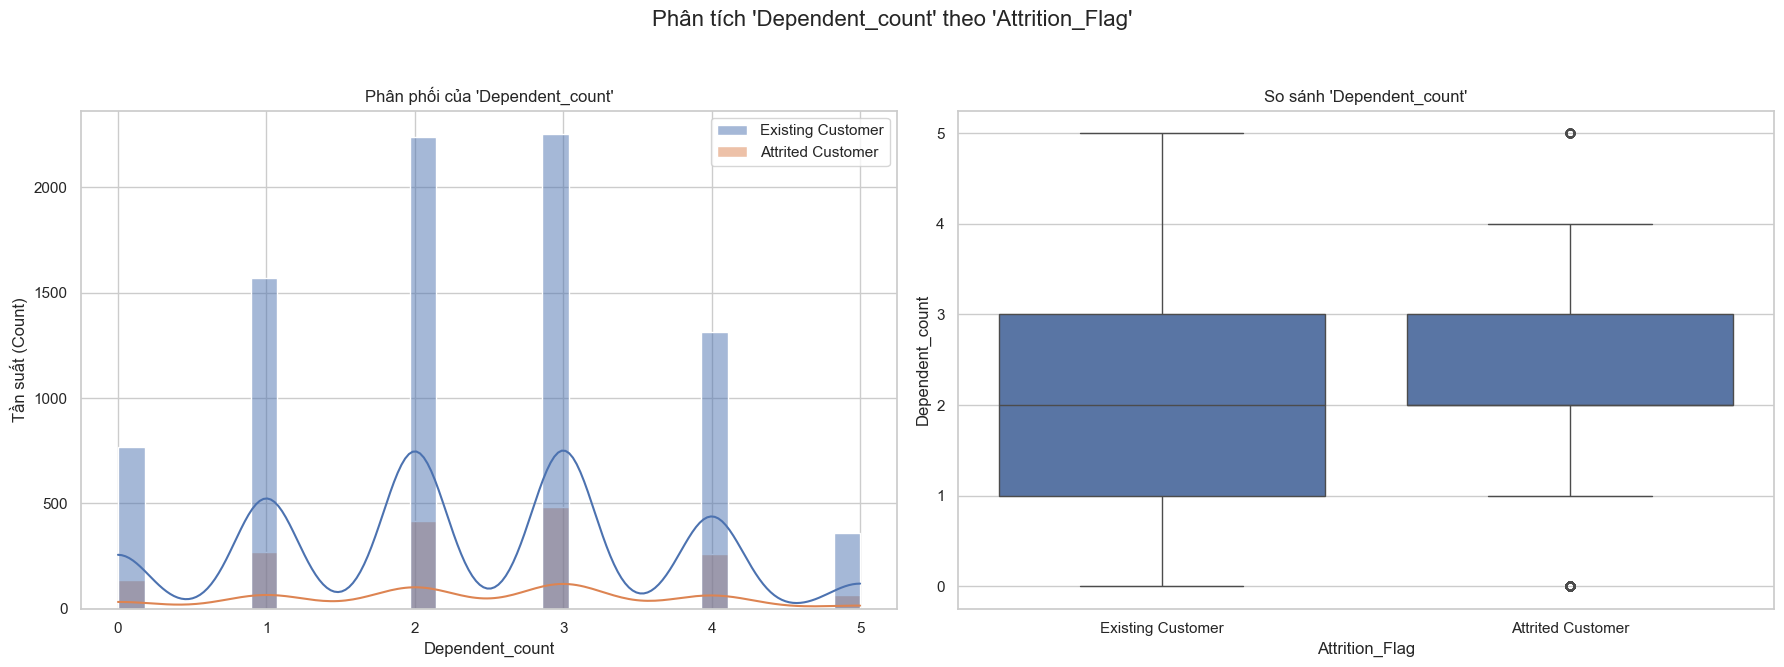


========================= Phân tích cột: MONTHS_ON_BOOK =========================

--- Tương quan: 'Months_on_book' vs 'Attrition_Flag' ---


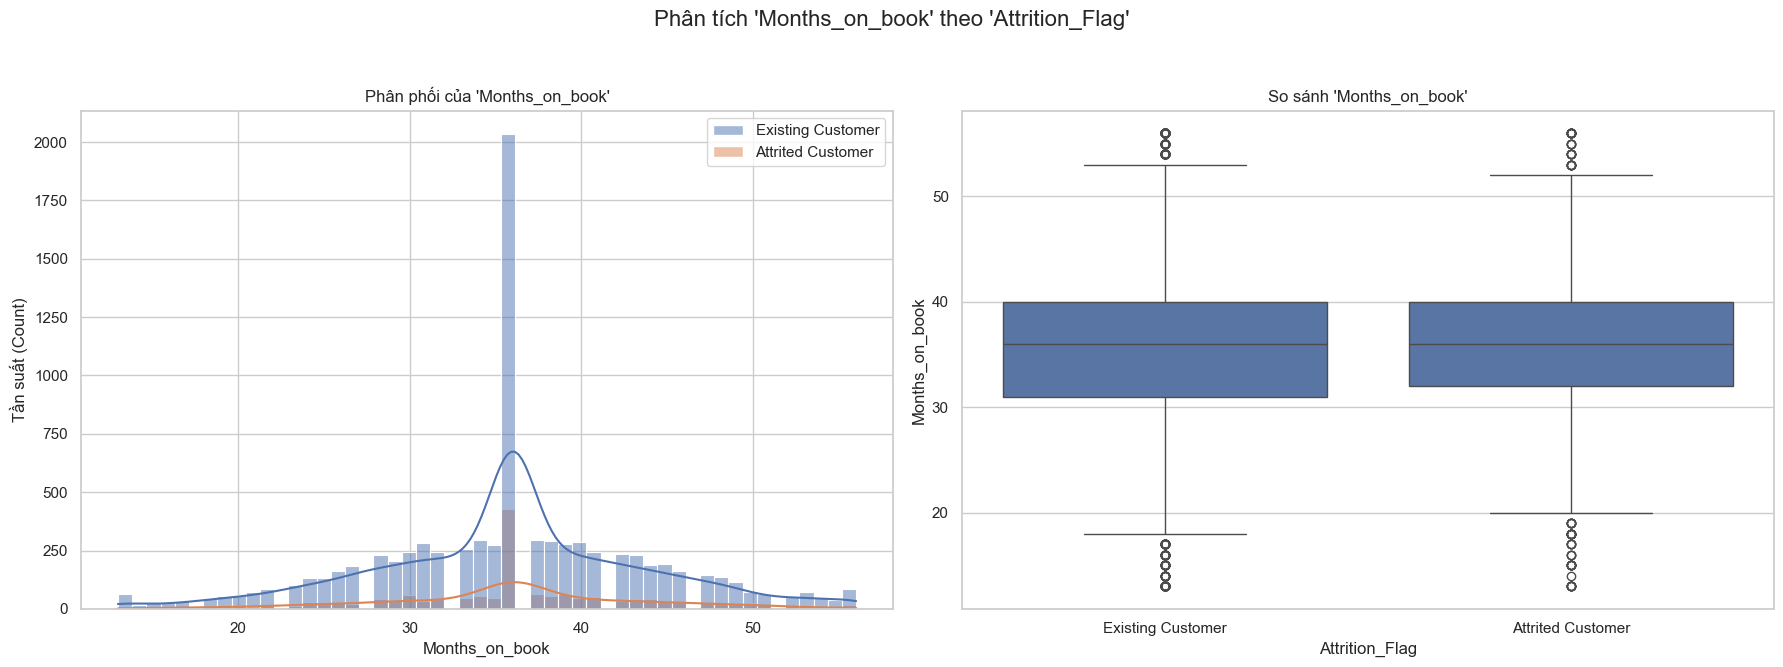


========================= Phân tích cột: TOTAL_RELATIONSHIP_COUNT =========================

--- Tương quan: 'Total_Relationship_Count' vs 'Attrition_Flag' ---


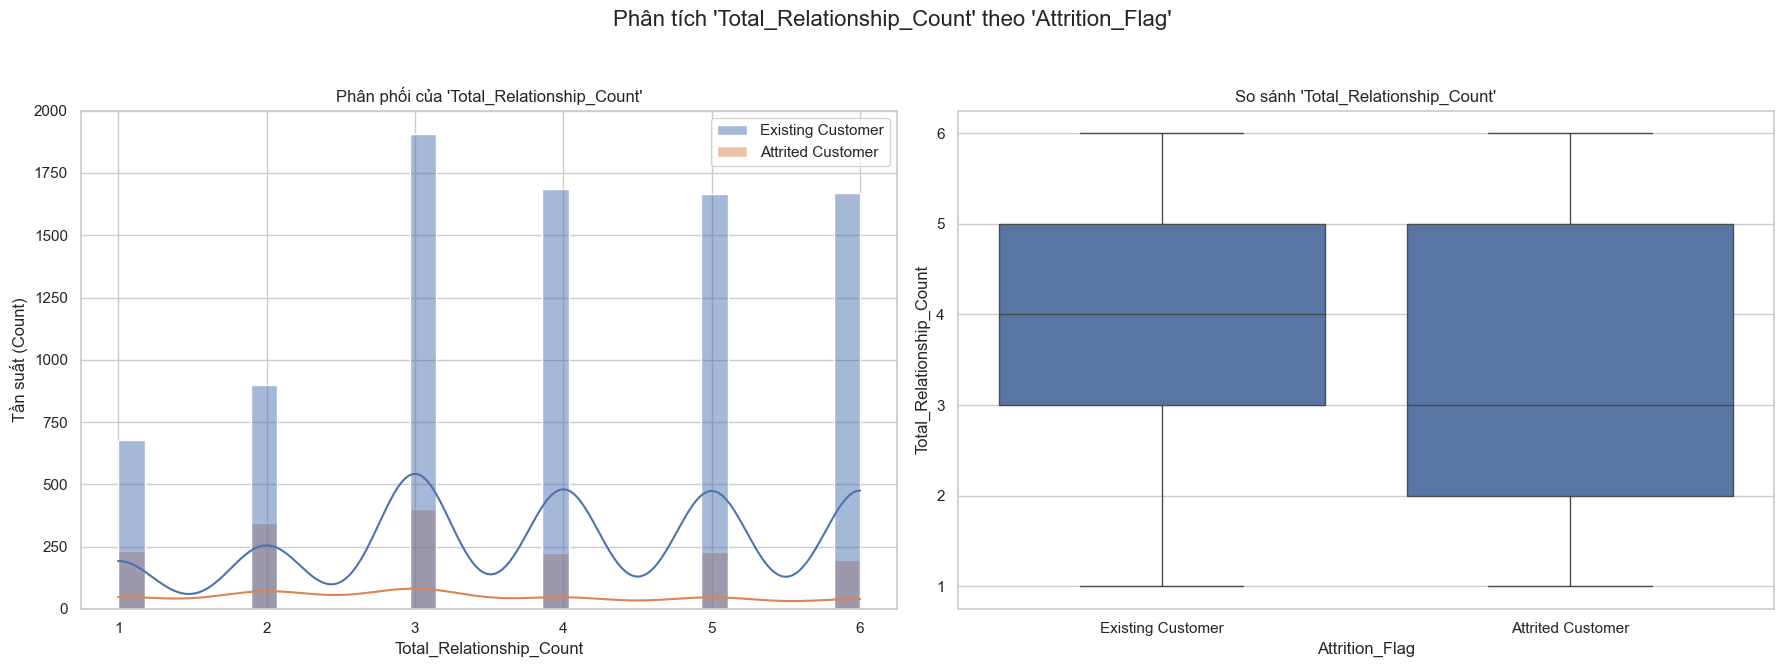


========================= Phân tích cột: MONTHS_INACTIVE_12_MON =========================

--- Tương quan: 'Months_Inactive_12_mon' vs 'Attrition_Flag' ---


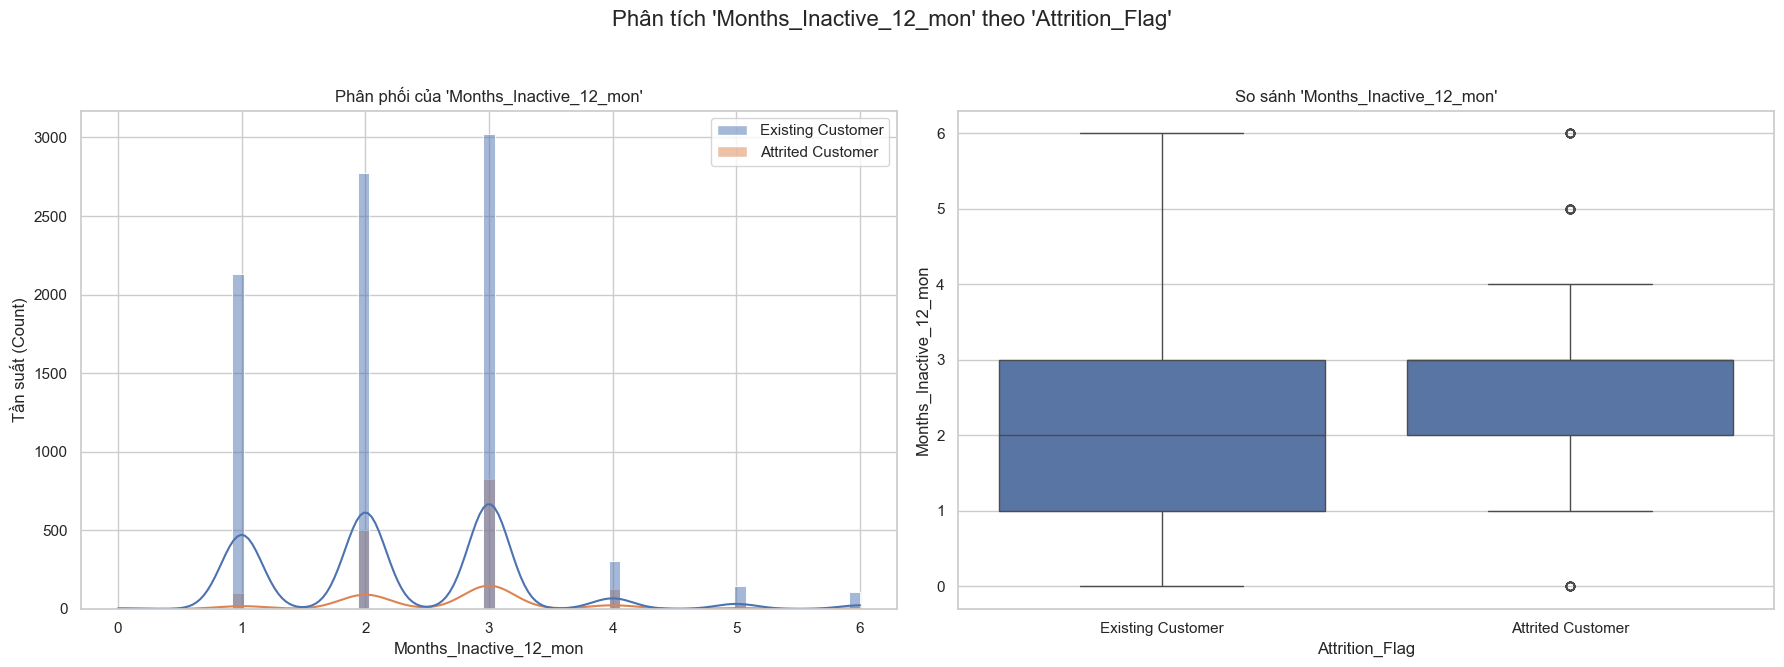


========================= Phân tích cột: CONTACTS_COUNT_12_MON =========================

--- Tương quan: 'Contacts_Count_12_mon' vs 'Attrition_Flag' ---


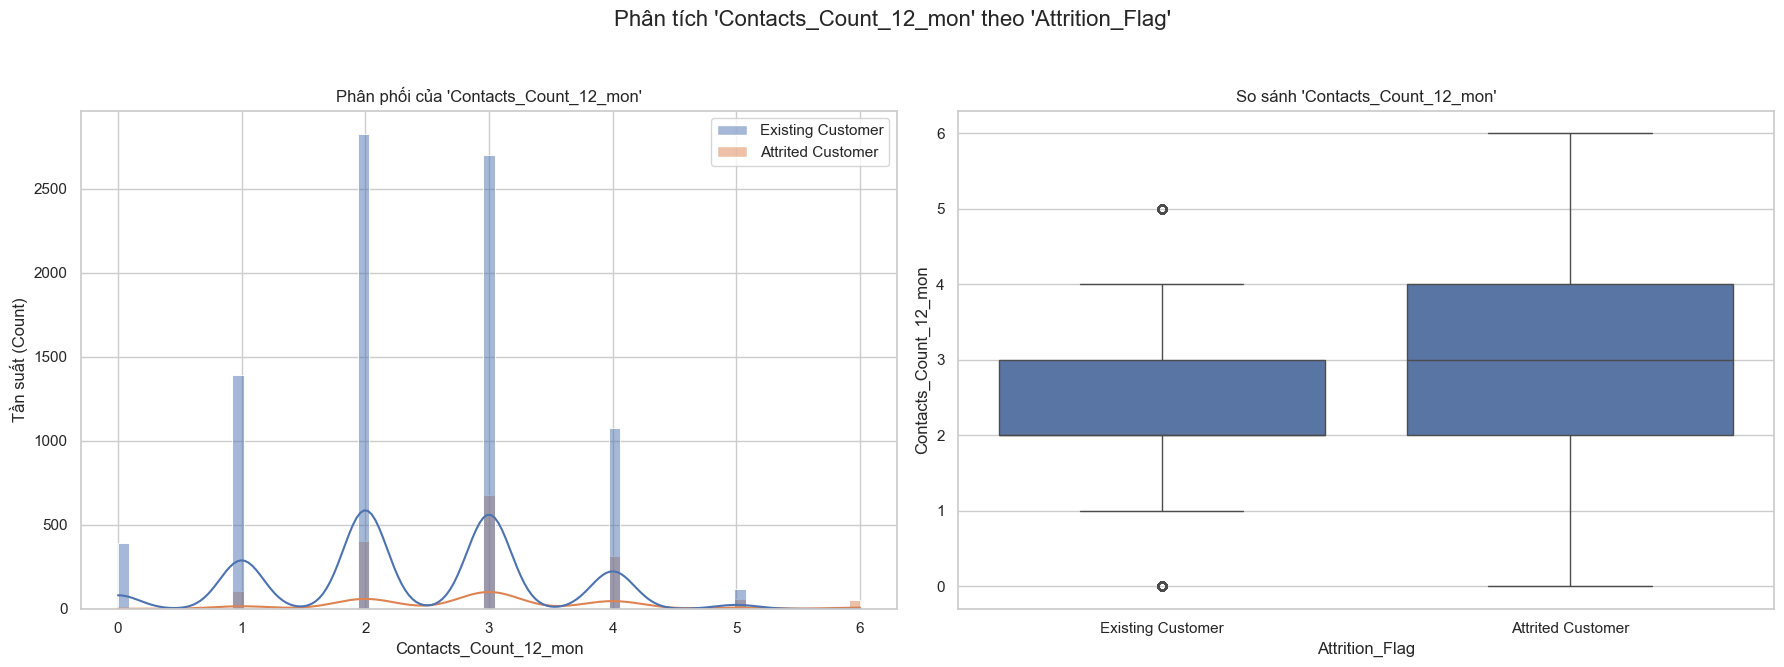


========================= Phân tích cột: CREDIT_LIMIT =========================

--- Tương quan: 'Credit_Limit' vs 'Attrition_Flag' ---


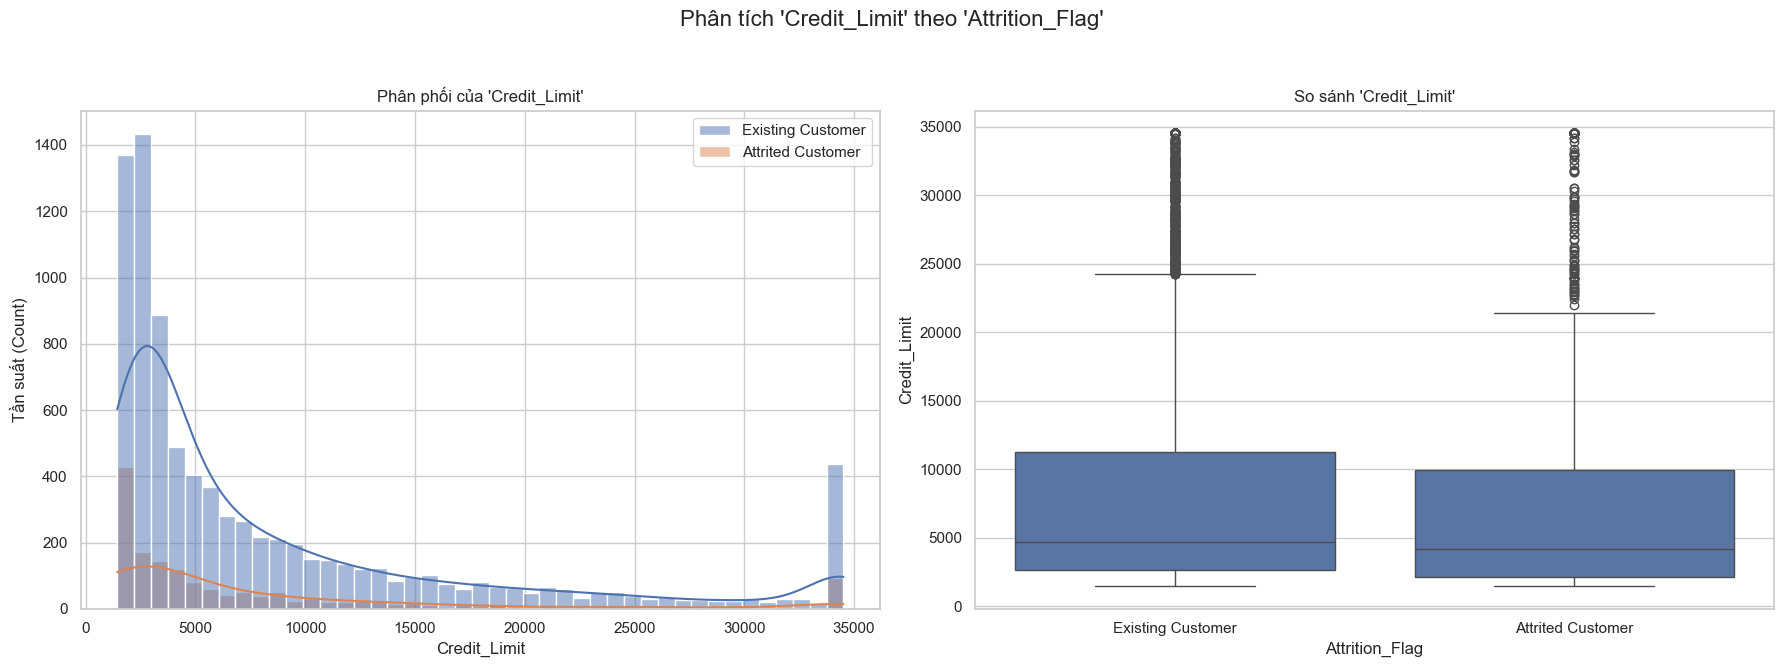


========================= Phân tích cột: TOTAL_REVOLVING_BAL =========================

--- Tương quan: 'Total_Revolving_Bal' vs 'Attrition_Flag' ---


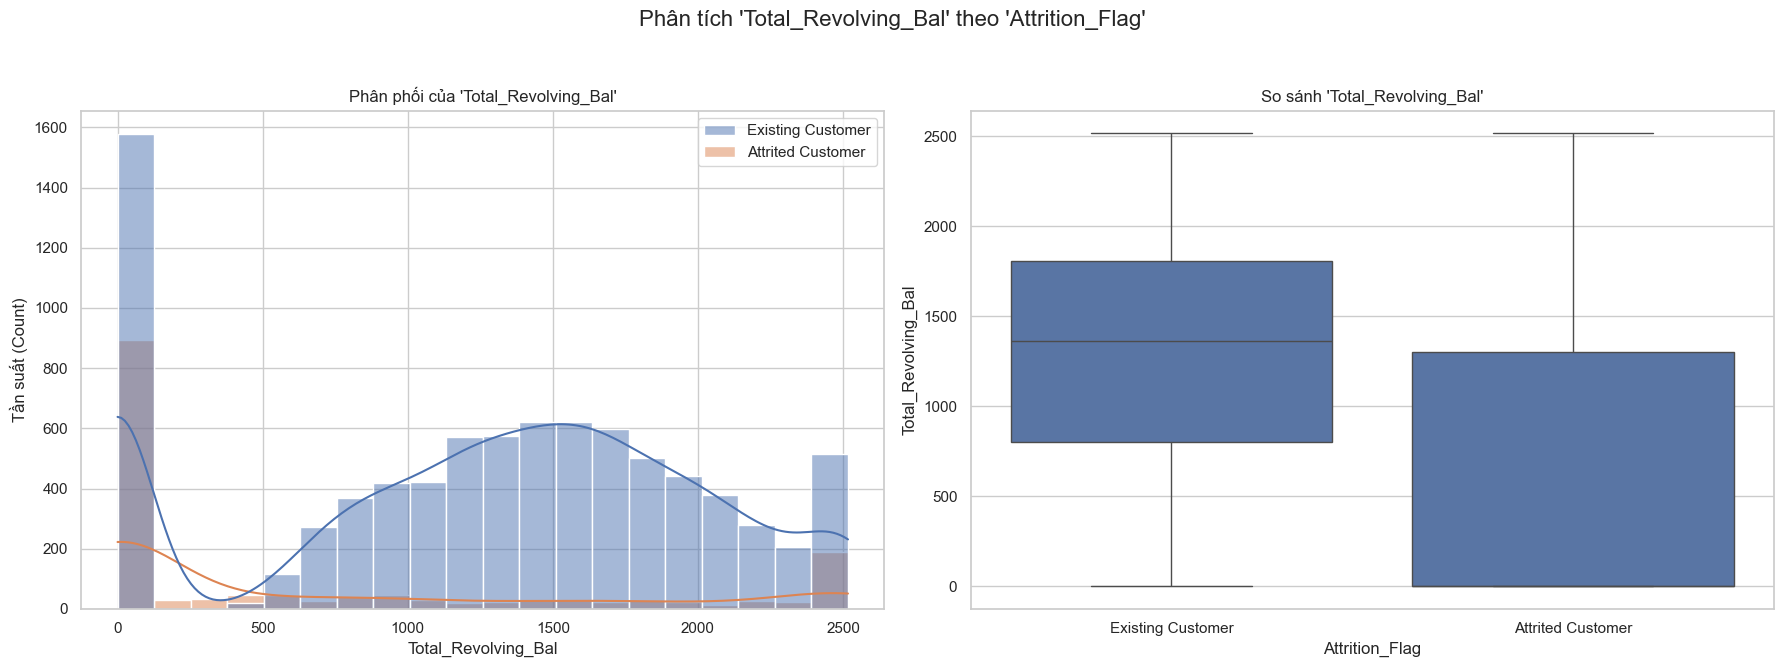


========================= Phân tích cột: AVG_OPEN_TO_BUY =========================

--- Tương quan: 'Avg_Open_To_Buy' vs 'Attrition_Flag' ---


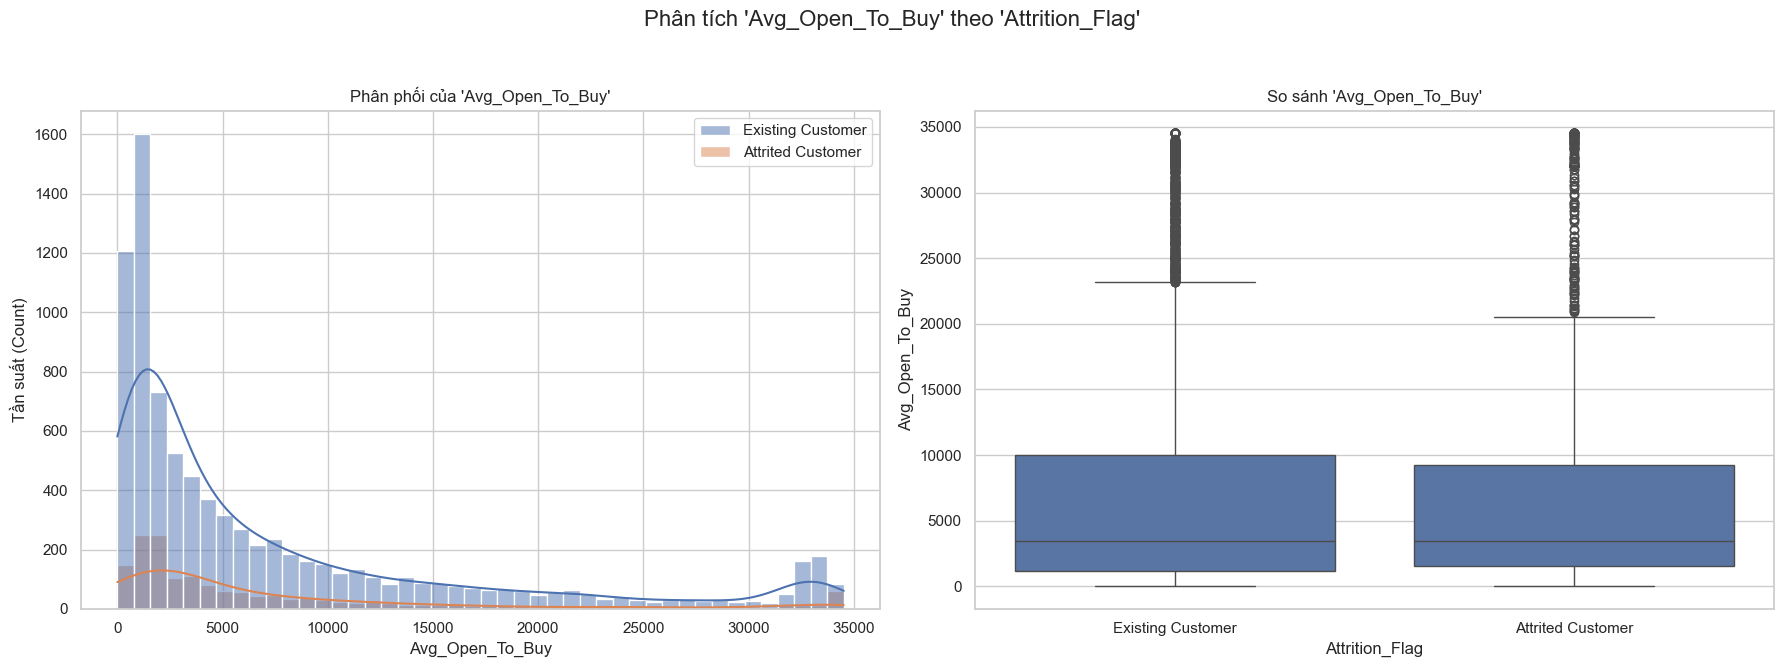


========================= Phân tích cột: TOTAL_AMT_CHNG_Q4_Q1 =========================

--- Tương quan: 'Total_Amt_Chng_Q4_Q1' vs 'Attrition_Flag' ---


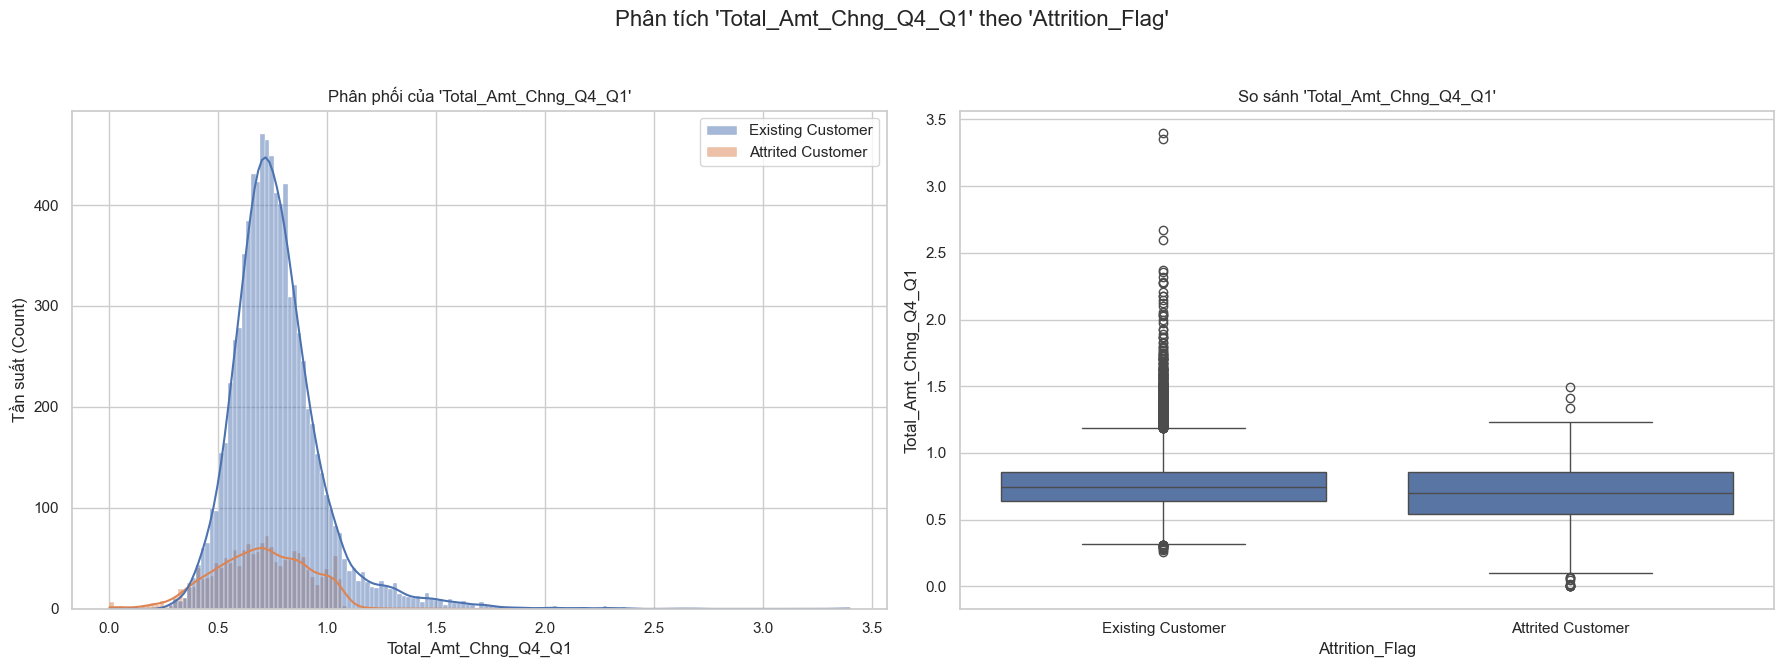


========================= Phân tích cột: TOTAL_TRANS_AMT =========================

--- Tương quan: 'Total_Trans_Amt' vs 'Attrition_Flag' ---


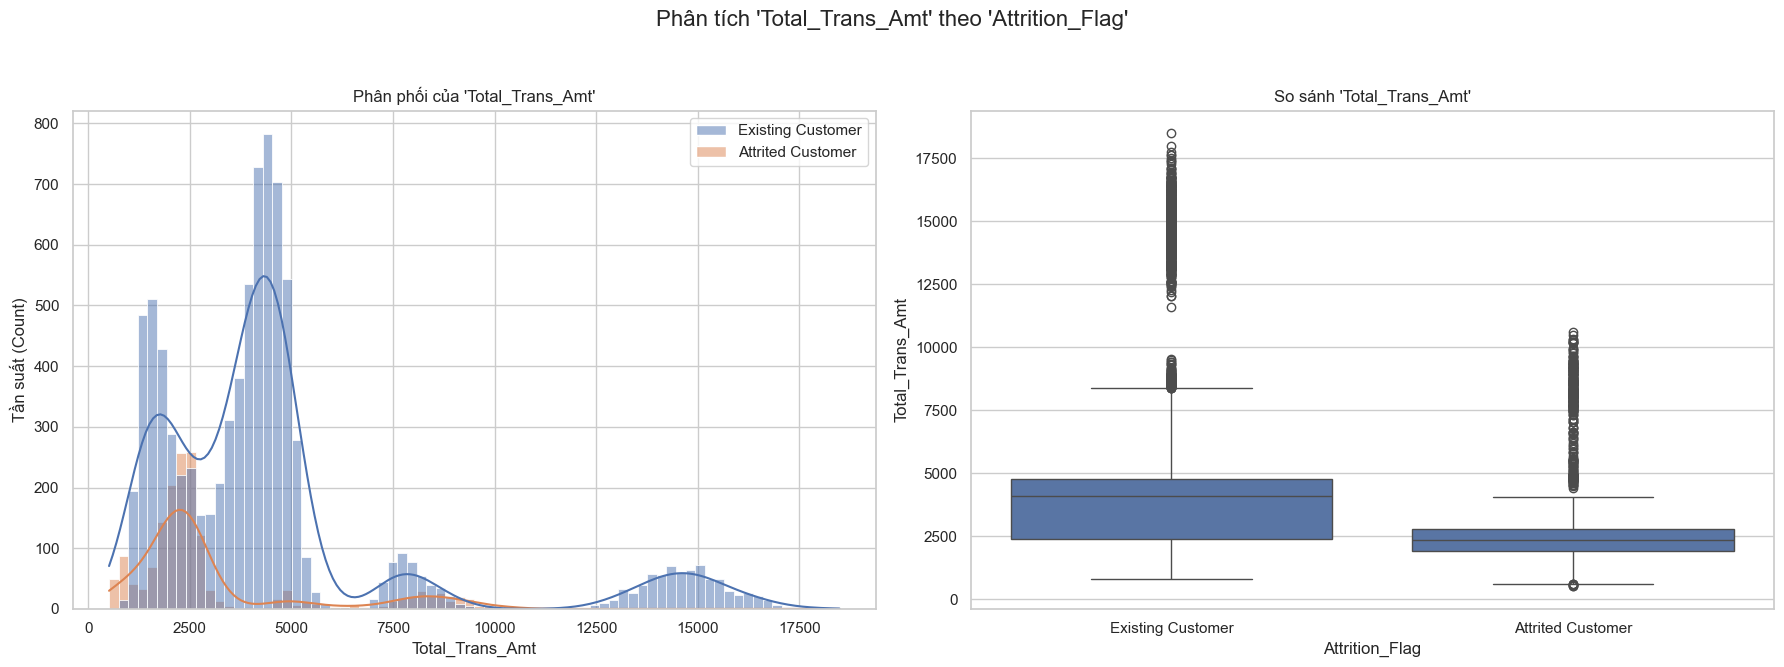


========================= Phân tích cột: TOTAL_TRANS_CT =========================

--- Tương quan: 'Total_Trans_Ct' vs 'Attrition_Flag' ---


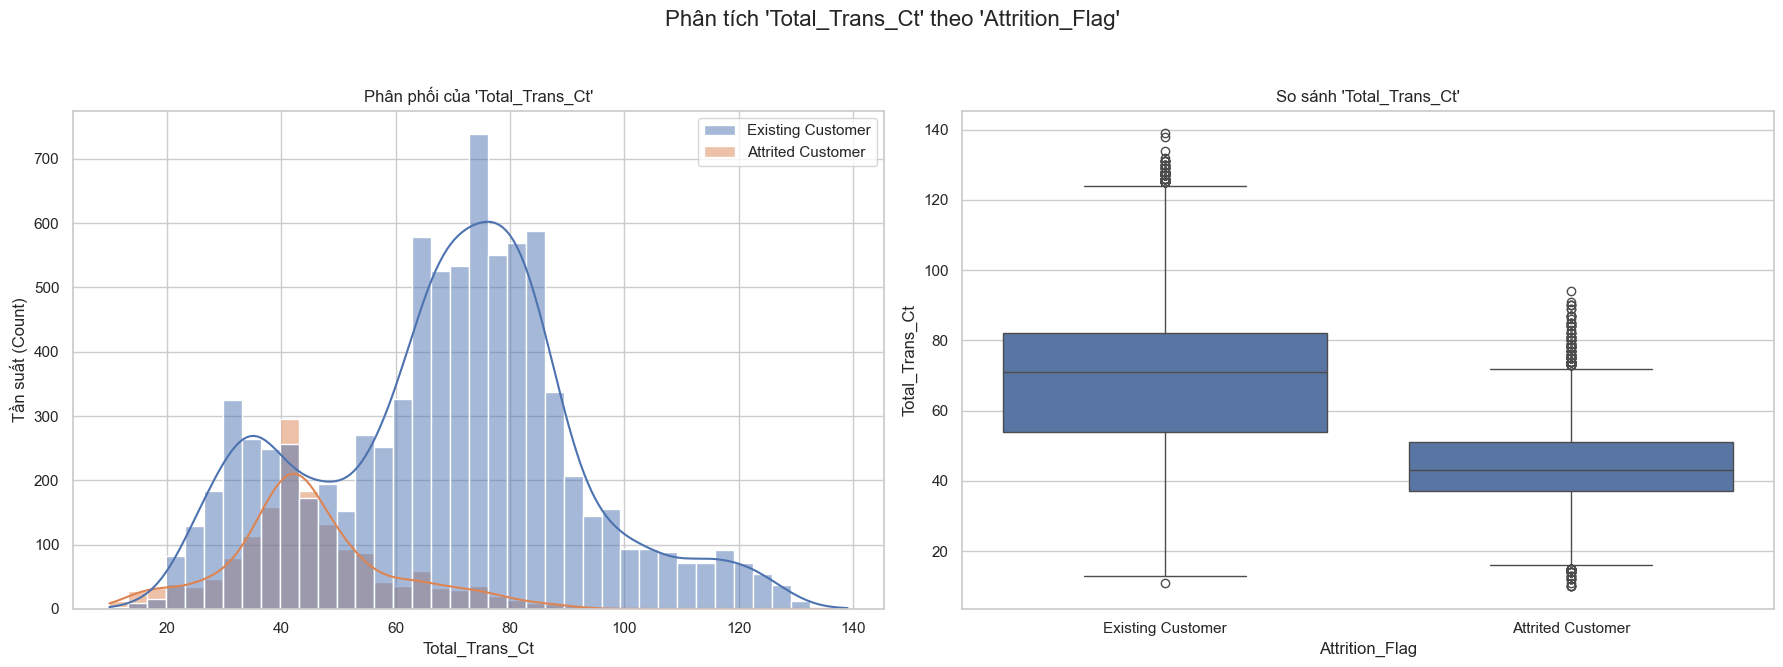


========================= Phân tích cột: TOTAL_CT_CHNG_Q4_Q1 =========================

--- Tương quan: 'Total_Ct_Chng_Q4_Q1' vs 'Attrition_Flag' ---


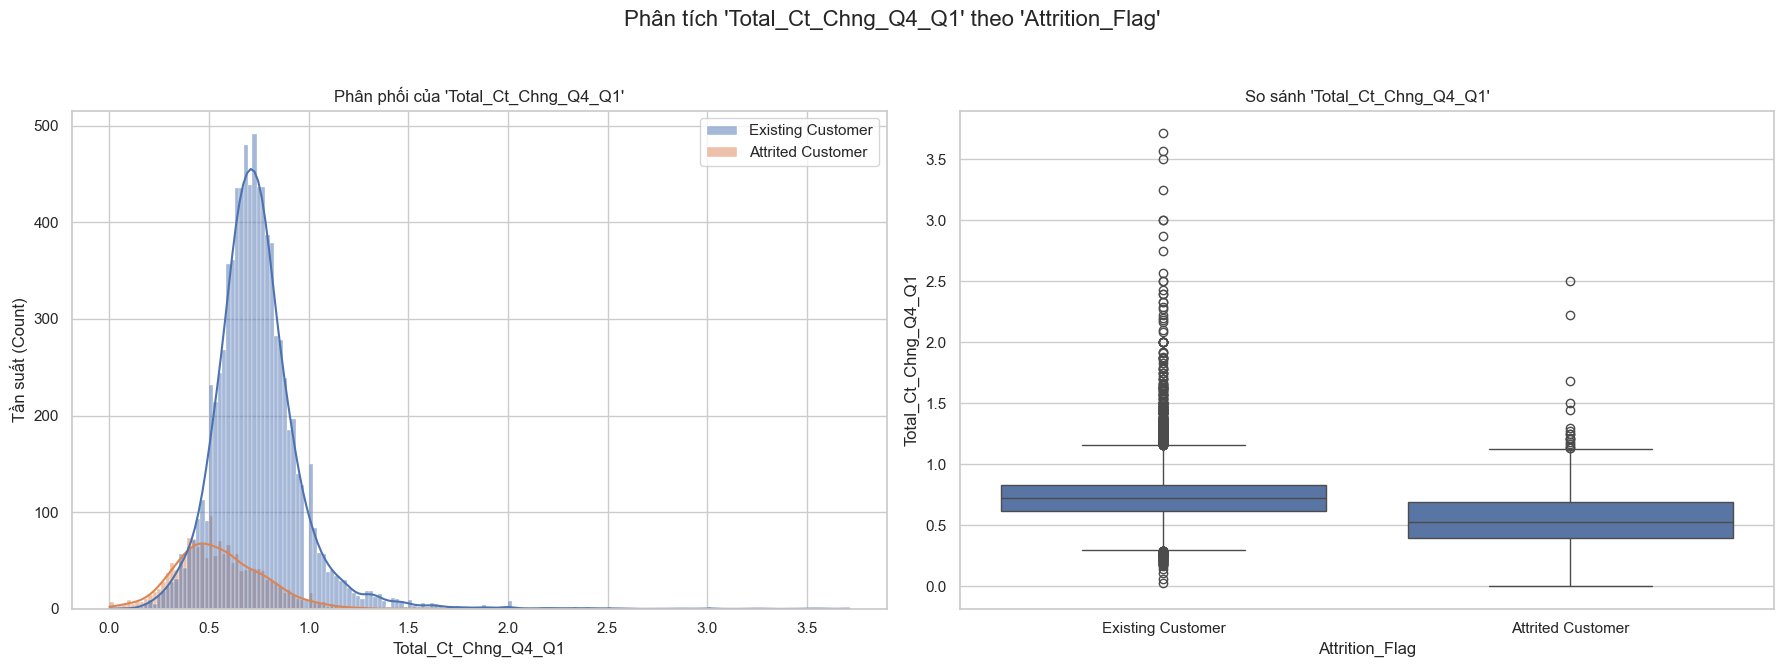


========================= Phân tích cột: AVG_UTILIZATION_RATIO =========================

--- Tương quan: 'Avg_Utilization_Ratio' vs 'Attrition_Flag' ---


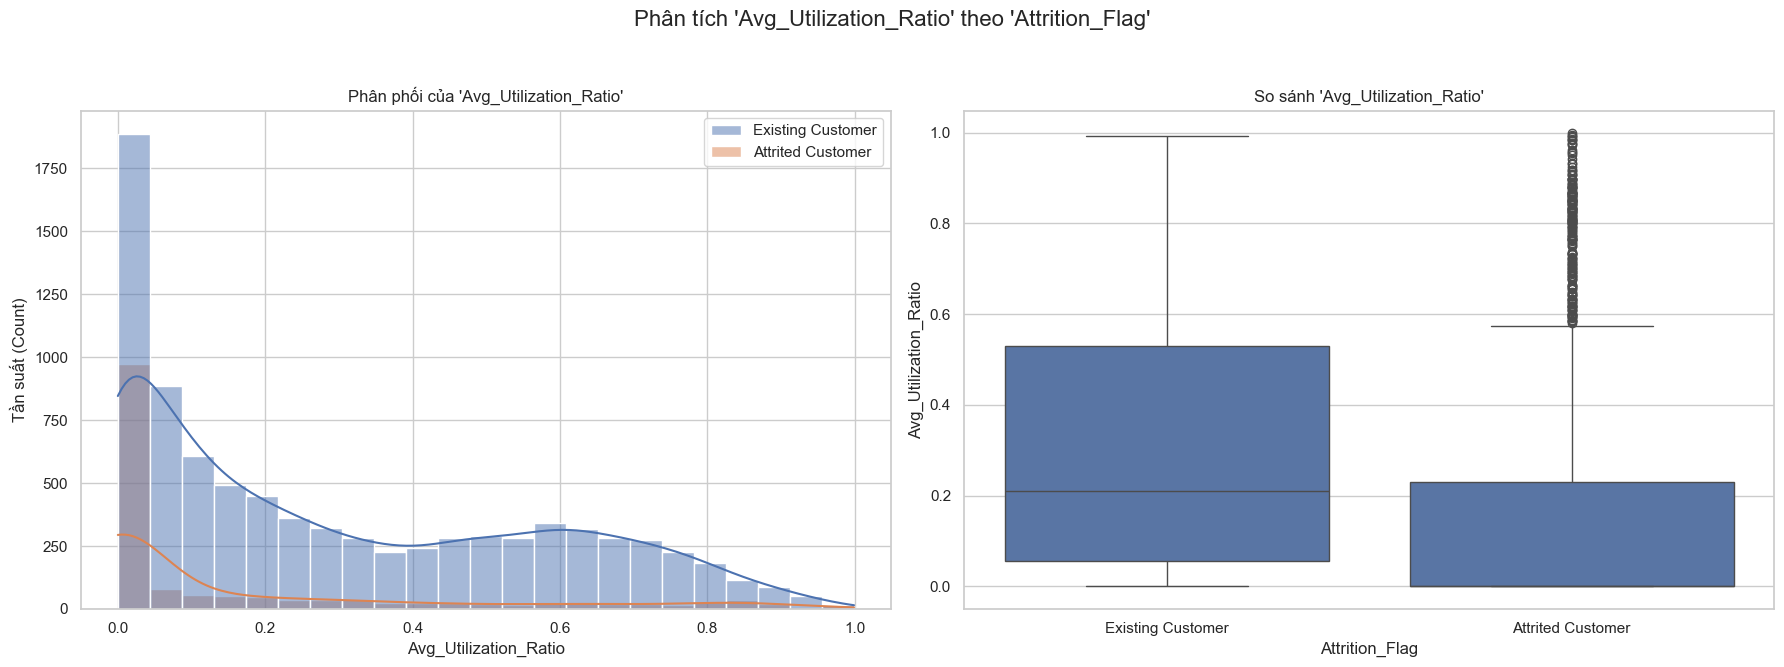

In [9]:
# --- BƯỚC 3: TỰ ĐỘNG PHÂN TÍCH TƯƠNG QUAN CHO CÁC CỘT NUMERICAL ---

for col in numerical_cols:
    # In ra một tiêu đề phân cách
    print(f"\n{'='*25} Phân tích cột: {col.upper()} {'='*25}\n")
    
    # Gọi hàm phân tích, dùng 'both' để có cả histogram và boxplot
    analyze_numerical_vs_target(credit_data, col, target_col, plot_type='both')

##  Phân tích và Nhận định chi tiết: Các biến Số (Numerical)

Dựa trên các biểu đồ, chúng ta có thể chia các đặc trưng numerical thành 3 nhóm: **Ảnh hưởng cực mạnh**, **Ảnh hưởng trung bình**, và **Ít ảnh hưởng**.

---

###  Nhóm 1: Các Đặc trưng Ảnh hưởng CỰC MẠNH (Dấu hiệu Báo động Đỏ)
*Đây là những đặc trưng mà phân phối của hai nhóm "Rời đi" và "Ở lại" gần như hoàn toàn tách biệt. Chúng là những yếu tố dự báo tốt nhất.*

#### 1. `Total_Trans_Ct` (Tổng số lượng giao dịch) & `Total_Trans_Amt` (Tổng số tiền giao dịch)
* **Nhận xét:** Đây là hai đặc trưng mạnh mẽ nhất. Biểu đồ histogram cho thấy hai đỉnh phân phối nằm ở hai vị trí hoàn toàn khác nhau. Biểu đồ boxplot cho thấy hai "hộp" gần như không chồng chéo.
* **Insight Quan trọng:** Sự sụt giảm trong hoạt động giao dịch là dấu hiệu rõ ràng nhất của một khách hàng sắp rời đi.
    * **Khách hàng trung thành (Existing):** Giao dịch nhiều (trung vị ~70-80 lần, chi tiêu ~$4000).
    * **Khách hàng đã rời đi (Attrited):** Giao dịch rất ít (trung vị ~45 lần, chi tiêu ~$2500).
* **🚀 Hành động:** Bất kỳ khách hàng nào có số lượng/số tiền giao dịch giảm xuống dưới một ngưỡng nhất định (ví dụ: **dưới 60 lần/năm**) cần được đưa vào danh sách "cần chăm sóc đặc biệt".

#### 2. `Total_Revolving_Bal` (Tổng dư nợ quay vòng)
* **Nhận xét:** Nhóm khách hàng đã rời đi có một đỉnh phân phối khổng lồ ở gần giá trị **0**. Hộp boxplot của họ nằm thấp hơn đáng kể.
* **Insight Quan trọng:** Khách hàng **không sử dụng tính năng "tín dụng"** (không có dư nợ) có nguy cơ rời đi rất cao.
    * Họ không mang lại lợi nhuận từ lãi suất.
    * Họ có thể chỉ dùng thẻ như phương tiện thanh toán thay thế, thiếu sự gắn bó.
* **Hành động:** Cần có chương trình khuyến khích sử dụng hạn mức tín dụng (ví dụ: trả góp 0% lãi suất).

#### 3. `Avg_Utilization_Ratio` (Tỷ lệ sử dụng hạn mức trung bình)
* **Nhận xét:** Tương tự như trên, nhóm rời đi có tỷ lệ sử dụng hạn mức cực thấp (gần như nằm bẹp ở trục hoành).
* **Insight Quan trọng:** Khách hàng không tận dụng hạn mức tín dụng được cấp là những người có nguy cơ rời đi cao nhất.

---

###  Nhóm 2: Ảnh hưởng TRUNG BÌNH đến CAO (Dấu hiệu Cảnh báo Sớm)
*Những đặc trưng có sự khác biệt nhưng không hoàn toàn tách biệt.*

#### 1. `Total_Ct_Chng_Q4_Q1` & `Total_Amt_Chng_Q4_Q1` (Tỷ lệ thay đổi giao dịch)
* **Nhận xét:** Giá trị trung vị ở nhóm rời đi thấp hơn một chút so với nhóm ở lại.
* ** Insight Quan trọng:** Sự sụt giảm trong tần suất và giá trị giao dịch theo thời gian là một **tín hiệu cảnh báo sớm**. Xu hướng giảm cho thấy sự quan tâm của họ đang giảm dần.

#### 2. `Contacts_Count_12_mon` (Số lần liên hệ)
* **Nhận xét:** Nhóm rời đi có số lần liên hệ trung vị cao hơn (**~3 lần**) so với nhóm ở lại (**~2 lần**).
* ** Insight Quan trọng:** Khách hàng liên hệ nhiều hơn thường là do họ gặp vấn đề. Việc phải liên hệ nhiều lần cho thấy trải nghiệm không suôn sẻ (pain point).

---

### 📉 Nhóm 3: Các Đặc trưng Ít hoặc Không Ảnh hưởng
*Phân phối của hai nhóm chồng chéo lên nhau rất nhiều.*

#### 1. Các chỉ số Nhân khẩu học (`Customer_Age`, `Dependent_count`) & Thâm niên (`Months_on_book`)
* **Nhận xét:** Biểu đồ của hai nhóm gần như giống hệt nhau.
* **Insight:** Tuổi tác, số người phụ thuộc hay thâm niên **không phải là lý do chính** khiến khách hàng rời đi.

#### 2. Chỉ số hạn mức (`Credit_Limit`, `Avg_Open_To_Buy`)
* **Nhận xét:** Mặc dù có chút khác biệt nhỏ, sự chồng chéo vẫn rất lớn.
* **Insight:** Hạn mức tín dụng không phải là yếu tố quyết định.

---

##  Tổng kết Insight Quan trọng từ nhóm Numerical

###  Hồ sơ Hành vi của Khách hàng sắp rời đi (High-Risk Behavior)
1.  **Giao dịch ít và chi tiêu ít** (Quan trọng nhất).
2.  **Không có hoặc rất ít dư nợ quay vòng** (Tỷ lệ sử dụng hạn mức ~ 0).
3.  Có **xu hướng giảm dần** hoạt động giao dịch theo thời gian.
4.  **Liên hệ** với dịch vụ khách hàng thường xuyên hơn.

 **Kết luận cuối cùng:**
 Hành vi sử dụng sản phẩm (**Behavior**) là yếu tố dự báo mạnh mẽ hơn nhiều so với đặc điểm nhân khẩu học (**Demographics**). Để giữ chân khách hàng, ngân hàng cần tập trung vào việc theo dõi và thúc đẩy sự tương tác của khách hàng với sản phẩm.

##  Nhận xét từ các Biểu đồ 

Dựa trên 3 biểu đồ đã phân tích, chúng ta có thể rút ra những nhận định (insights) ban đầu rất giá trị:

### 1. Tương quan với Giới tính (Gender)
* **Dữ liệu:** Tỷ lệ rời đi của khách hàng **Nữ (F)** là **17.36%**, trong khi của **Nam (M)** là **14.62%**.
* **Nhận xét:** Có sự khác biệt, cho thấy khách hàng nữ có xu hướng rời đi cao hơn một chút so với khách hàng nam. Tuy nhiên, sự chênh lệch này **không quá lớn**. Yếu tố Gender không ảnh hưởng lớn đến quyết định rời đi hay ở lại của khách hàng
---

### 2. Tương quan với Thu nhập (Income Category)
* **Dữ liệu:** Tỷ lệ rời đi cao nhất tập trung ở hai nhóm:
    * **Less than $40K**: 17.19%
    * **$120K +**: 17.33%
    * *(Nhóm có tỷ lệ rời đi thấp nhất là **$60K - $80K** với 13.48%)*
* **Nhận xét:** Mối quan hệ ở đây **không đơn giản** (không phải cứ thu nhập thấp là rời đi nhiều hơn). Điều thú vị là cả hai nhóm thu nhập **thấp nhất** và **cao nhất** đều có tỷ lệ rời đi cao. Điều này gợi ý rằng lý do rời đi của hai nhóm này có thể hoàn toàn khác nhau. Như vậy cũng không thể dựa vào mức thu nhập để đánh giá mức độ rời đi
---

### 3. Tương quan với Loại thẻ (Card Category)
* **Dữ liệu:** Tỷ lệ rời đi của nhóm **Platinum** là **25.00%**, cao vượt trội so với các nhóm còn lại (*Gold: 18.10%, Blue: 16.10%, Silver: 14.77%*).
* **Nhận xét:**  **Đây là một phát hiện cực kỳ quan trọng!**
`Card_Category` có vẻ là một yếu tố ảnh hưởng rất mạnh đến việc khách hàng có rời đi hay không. Việc **1/4 khách hàng sở hữu thẻ Platinum** rời đi là một **"tín hiệu báo động đỏ"** cho ngân hàng cần được lưu ý đặc biệt.

--- Tương quan: 'Total_Trans_Ct' vs 'Attrition_Flag' ---


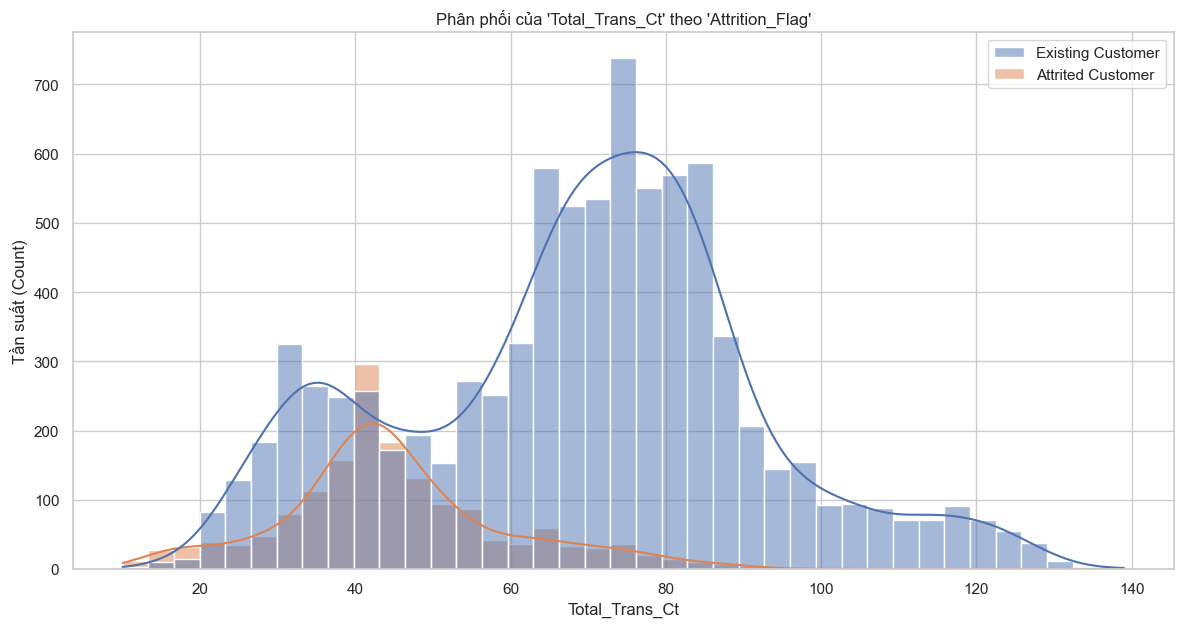

--- Tương quan: 'Total_Trans_Ct' vs 'Attrition_Flag' ---


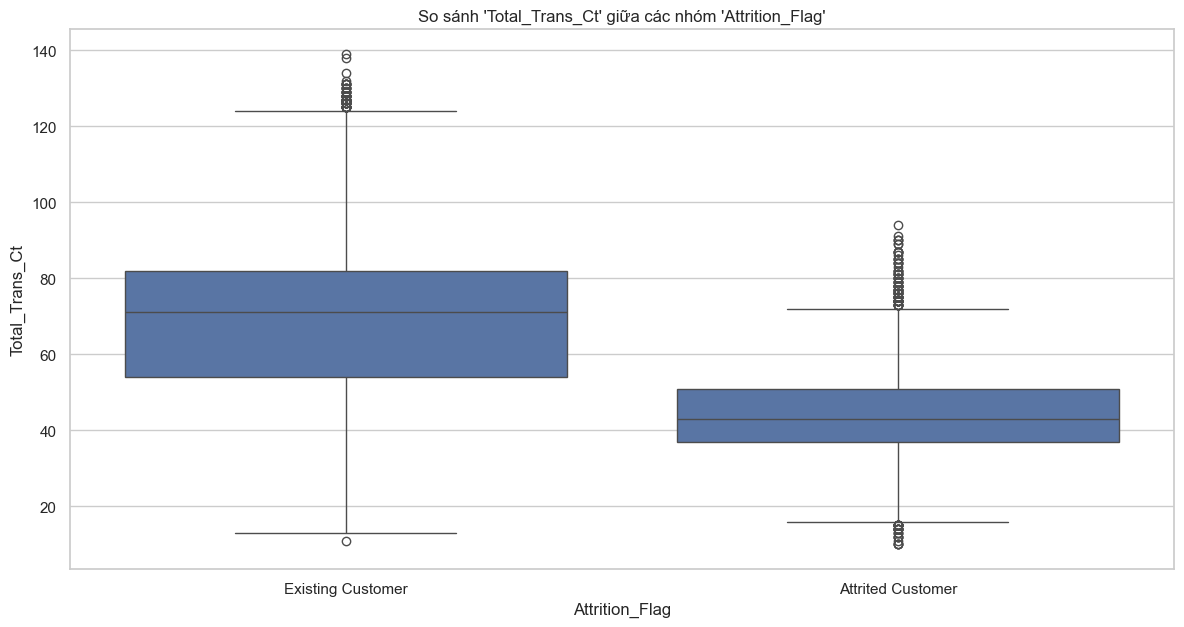

--- Tương quan: 'Customer_Age' vs 'Attrition_Flag' ---


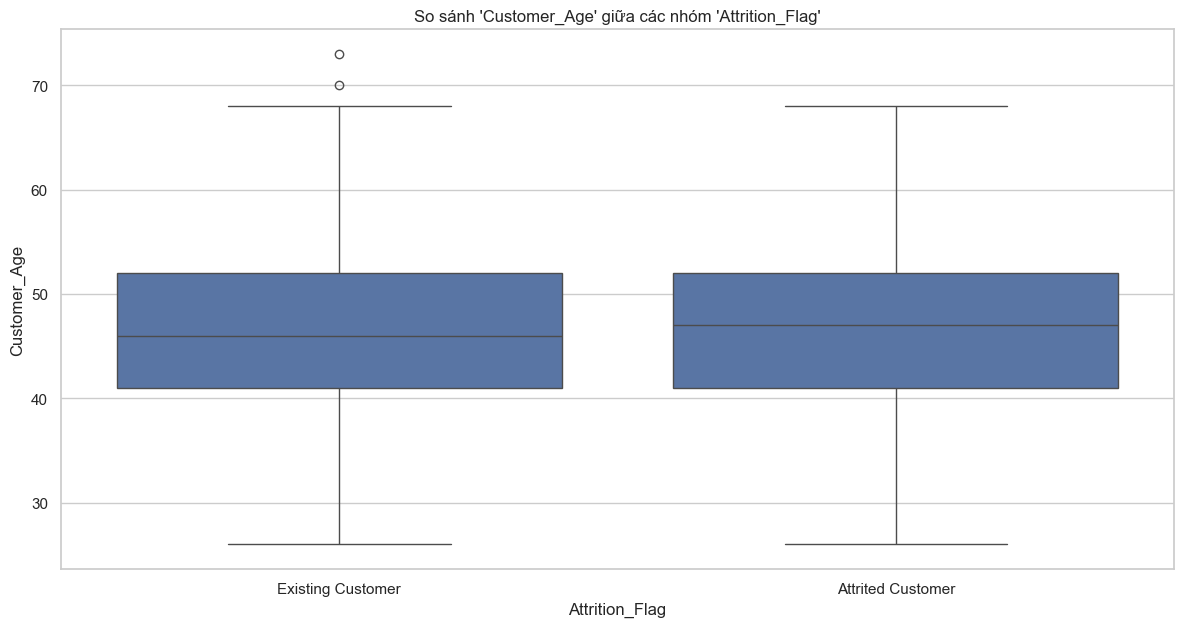

In [10]:
# --- Phân tích Tương quan với các biến Numerical ---

# 1. Total_Trans_Ct (Tổng số lượng giao dịch) - Cột này rất quan trọng!
# Dùng histogram để xem hình dạng phân phối của 2 nhóm.
analyze_numerical_vs_target(credit_data, 'Total_Trans_Ct', 'Attrition_Flag', plot_type='hist')

# Dùng boxplot để so sánh trực tiếp giá trị trung vị và các phân vị.
analyze_numerical_vs_target(credit_data, 'Total_Trans_Ct', 'Attrition_Flag', plot_type='box')







# 4. Customer_Age (Tuổi khách hàng)
analyze_numerical_vs_target(credit_data, 'Customer_Age', 'Attrition_Flag', plot_type='box')

--- Tương quan: 'Months_Inactive_12_mon' vs 'Attrition_Flag' ---


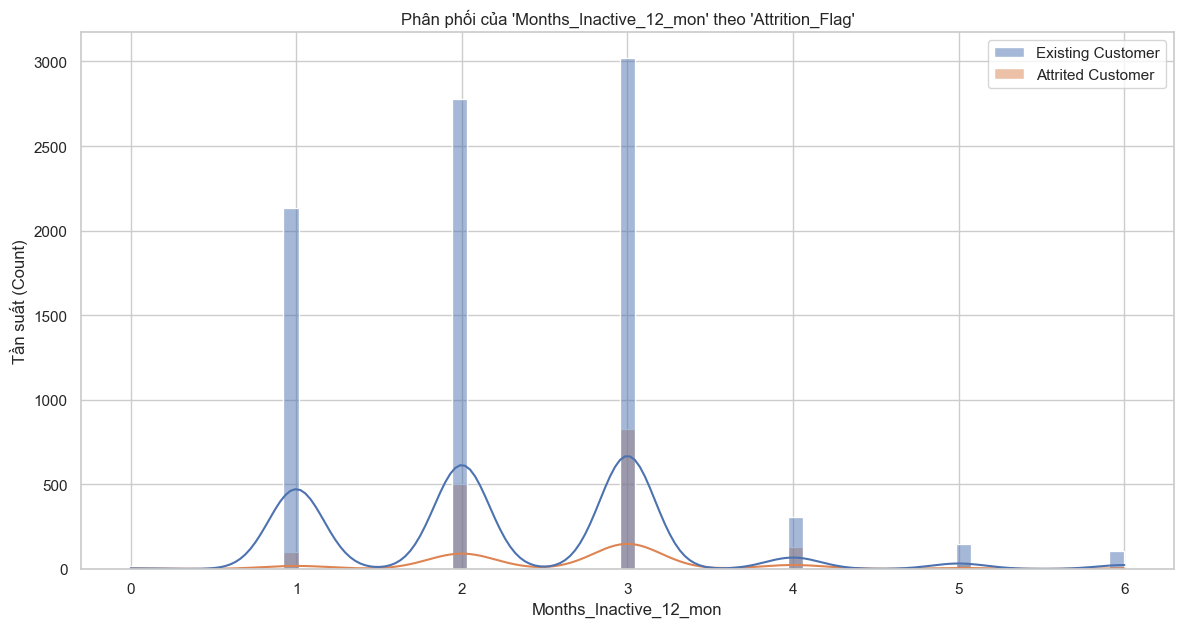

--- Tương quan: 'Months_Inactive_12_mon' vs 'Attrition_Flag' ---


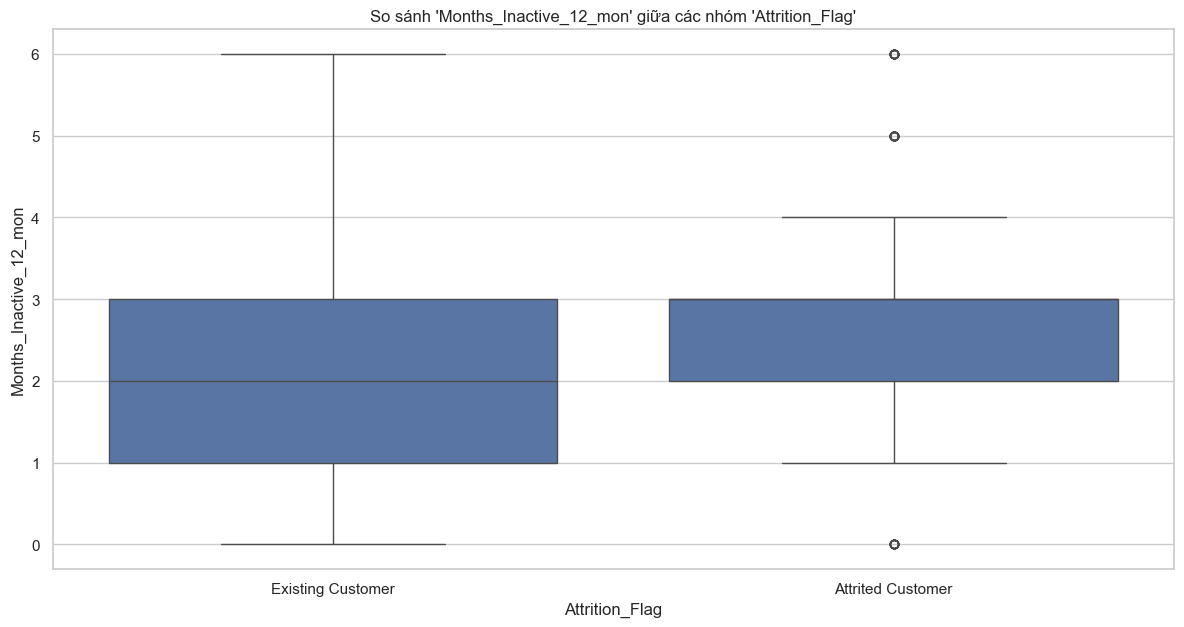

In [11]:
# 2. Months_Inactive_12_mon (Số tháng không hoạt động)
analyze_numerical_vs_target(credit_data, 'Months_Inactive_12_mon', 'Attrition_Flag', plot_type='hist')
# Boxplot rất hiệu quả ở đây để xem nhóm nào có số tháng không hoạt động cao hơn.
analyze_numerical_vs_target(credit_data, 'Months_Inactive_12_mon', 'Attrition_Flag', plot_type='box')


--- Tương quan: 'Credit_Limit' vs 'Attrition_Flag' ---


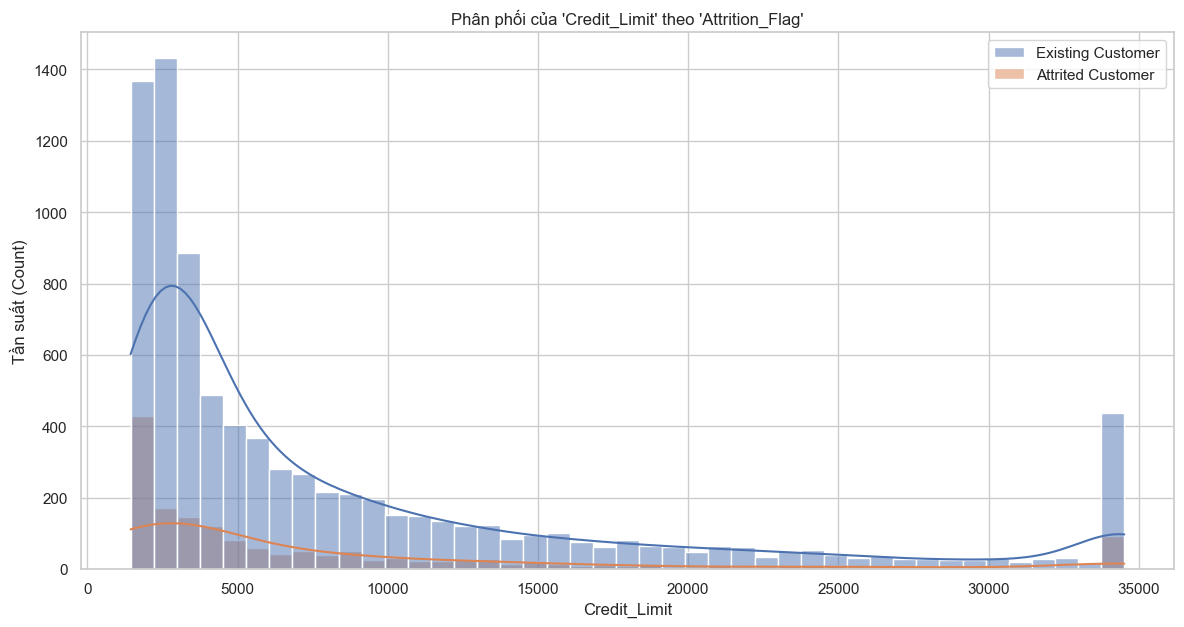

--- Tương quan: 'Credit_Limit' vs 'Attrition_Flag' ---


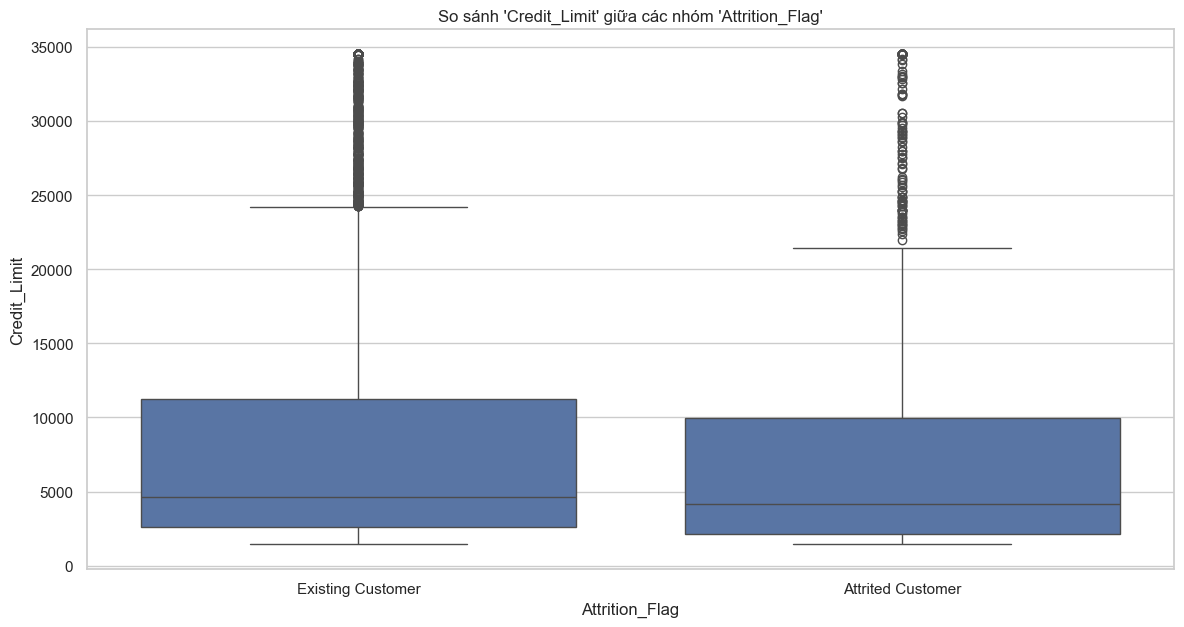

In [12]:
# 3. Credit_Limit (Hạn mức tín dụng)
analyze_numerical_vs_target(credit_data, 'Credit_Limit', 'Attrition_Flag', plot_type='hist')
analyze_numerical_vs_target(credit_data, 'Credit_Limit', 'Attrition_Flag', plot_type='box')

--- Tương quan: 'Customer_Age' vs 'Attrition_Flag' ---


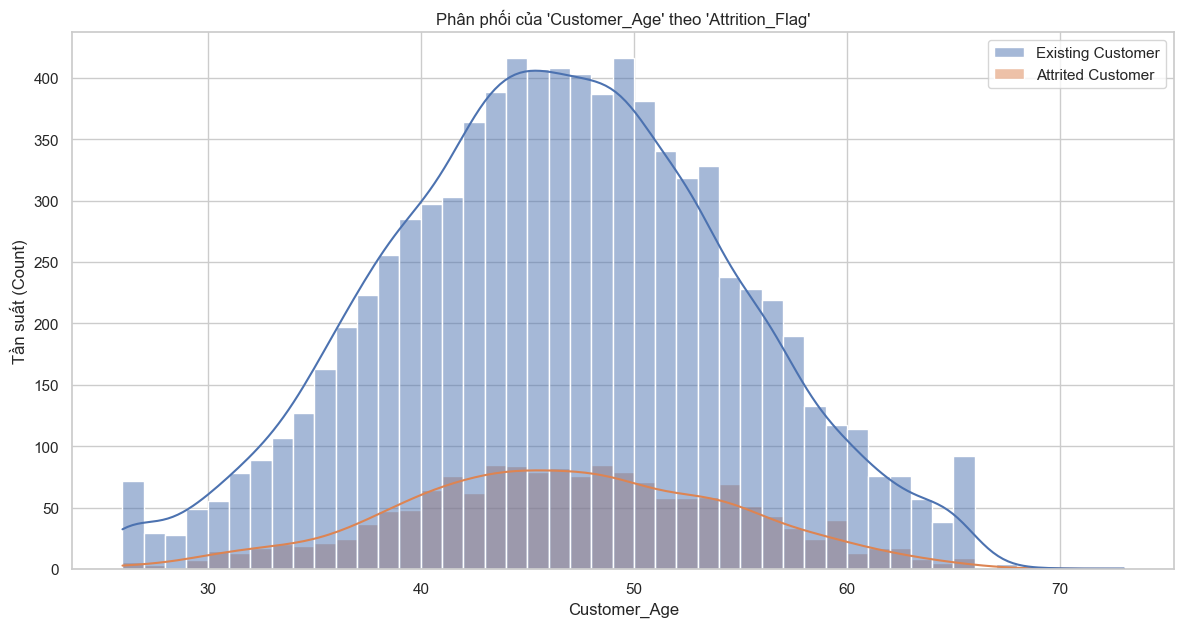

--- Tương quan: 'Customer_Age' vs 'Attrition_Flag' ---


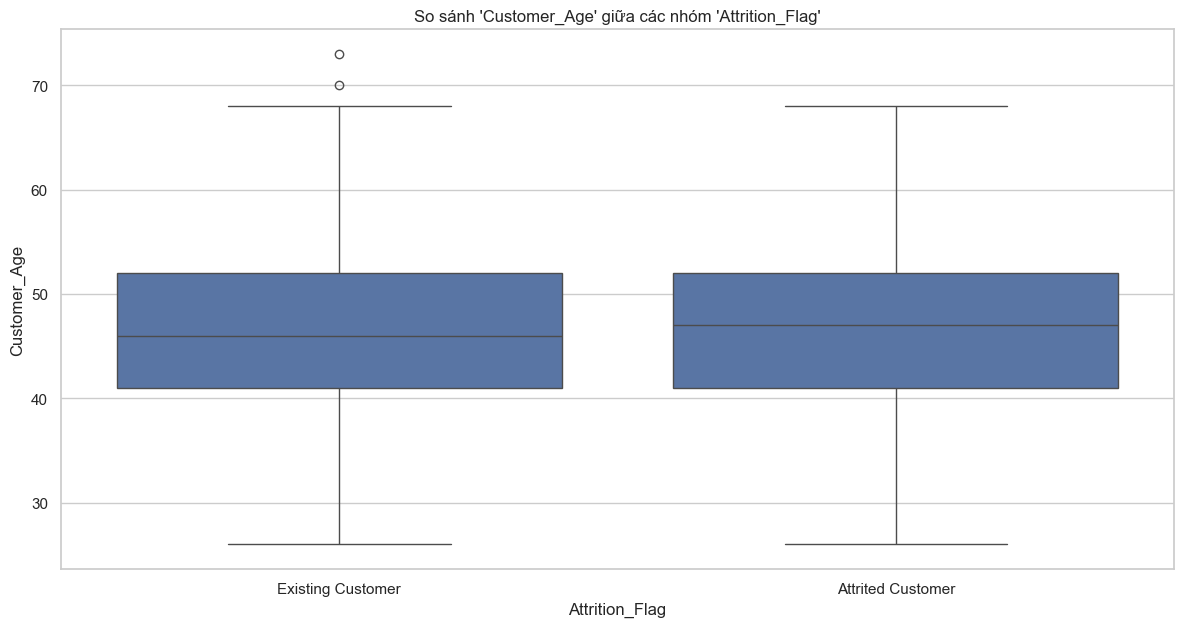

In [13]:
# 4. Customer_Age (Tuổi khách hàng)
analyze_numerical_vs_target(credit_data, 'Customer_Age', 'Attrition_Flag', plot_type='hist')
analyze_numerical_vs_target(credit_data, 'Customer_Age', 'Attrition_Flag', plot_type='box')